# 2.4 Схема проекта с отложенной выборкой (разбиением на train test)

Что будем делать:
- получим данные
- сформируем тренировочный и тестовый датасеты
- обучим модель
- оценим результат

## Загрузка данных

In [1]:
import pandas as pd

df = pd.read_csv("data/house_prices.csv")

## Обзор данных

In [2]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [3]:
df.shape

(20000, 9)

## Выделение матрицы объект-признак и целевой переменной

In [4]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

## Разбиение выборки на тренировочную и тестовую части

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Обучение модели на тренировочных данных

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## Предсказание модели на тестовых данных

In [7]:
prediction = model.predict(X_test)

In [8]:
prediction[:10]

array([  3634.54014459, 212458.46103116, 278501.95085509,  70041.88004127,
       304070.89408958, 131388.863149  , 132069.04298239, 415036.94795881,
       356753.34288172, 196207.91156303])

## Вычисление метрики MSE на тестовых данных

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mean_squared_error(y_test, prediction)

4807903806.065134

In [10]:
mean_squared_error(y_test, prediction) ** 0.5

69339.0496478365

In [11]:
print(f'{mean_absolute_percentage_error(y_test, prediction):.2f}')

0.30


# 2.6 Разведочный анализ данных

Это задание посвящено изучению данных и построению различных визуализаций.  
Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы будем работать с датассетом пассажиров [Титаника](https://en.wikipedia.org/wiki/Titanic).

Классическая задача, решаемая на этих данных: предсказать, выжил пассажир или нет по его характеристикам.  
То есть целевая переменная - столбец `Survived`.

Цели:
* познакомиться с библиотекой `seaborn`
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и оценим ее качество.

## Подключение библиотек и загрузка данных

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

Фиксируем `random_state` для воспроизводимости случайных значений.

In [13]:
RANDOM_STATE = 42

Загрузим данные.

In [14]:
Data = pd.read_csv("data/titanik.csv", sep=";")

**Описание признаков**

- `Survived` — выжил данный пассажир или нет (*0* для умерших, *1* для выживших)
- `Pclass` — класс пассажира (*1* — высший, *2* — средний, *3* — низший)
- `Name` — имя
- `Sex` — пол
- `Age` — возраст
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника
- `Ticket` — номер билета
- `Fare` — плата за проезд
- `Cabin` — каюта
- `Embarked` — порт посадки (*C* — Шербур; *Q* — Квинстаун; *S* — Саутгемптон)

## Обзор данных

Посмотрим на *5* случайных объектов из датасета.

In [15]:
Data.sample(5)

PassengerId  Survived  Pclass                                 Name  \
620          621         0       3                  Yasbeck; Mr. Antoni   
848          849         0       2                    Harper; Rev. John   
261          262         1       3    Asplund; Master. Edvin Rojj Felix   
647          648         1       1  Simonius-Blumer; Col. Oberst Alfons   
697          698         1       3     Mullens; Miss. Katherine "Katie"   

        Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
620    male  27.0      1      0    2659  14.4542   NaN        C  
848    male  28.0      0      1  248727  33.0000   NaN        S  
261    male   3.0      4      2  347077  31.3875   NaN        S  
647    male  56.0      0      0   13213  35.5000   A26        C  
697  female   NaN      0      0   35852   7.7333   NaN        Q

Выведите на экран размеры таблицы *Data*.

**Вопрос:** сколько объектов в данных?

In [16]:
len(Data)

891

## Обработка признаков и однофакторный анализ

На данном этапе:

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

Выведем на экран основные числовые характеристики числовых столбцов.  
Это можно сделать при помощи функции `describe`.

In [17]:
Data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

В строке *count* отображается количество непропущенных значений в каждом столбце.

Основные статистики можно посмотреть и по категориальным колонкам.  
Для этого в функцию `describe` нужно передать аргумент `include='object'`.

Сделайте это.

In [18]:
Data.describe(include='object')

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     3     681      147        3
top     Braund; Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   574       7        4      644

In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
Data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Вопрос:** в скольких категориальных колонках есть пропуски?

In [21]:
categorical = []
for col in Data.columns:
    if Data[col].dtype == object:
        categorical.append(col)
res = 0
for col in categorical:
    if Data[col].isna().sum() > 0:
        res += 1
print(res)

2


### Столбец Sex

В столбце пол (`Sex`) три различных значения. Посмотрим на них.

In [22]:
Data['Sex'].value_counts()

Sex
male       574
female     312
unknown      5
Name: count, dtype: int64

Удалим пассажиров неизвестного пола, так как их всего *5*.

In [23]:
Data = Data[Data['Sex'] != 'unknown']

Проверьте, что строки с неизвестным полом исчезли.

In [24]:
display(Data['Sex'].describe())
Data['Sex'].unique()

count      886
unique       2
top       male
freq       574
Name: Sex, dtype: object

array(['male', 'female'], dtype=object)

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа.

Закодировать значения столбца с двумя категориями можно следующим образом. Пусть в воображаемом столбце *animal* есть два значения: *cat* и *dog*. Их можно перевести в *0* и *1* при помощи функции `map`:

`Data['animal'] = Data['animal'].map({'cat' : 1, 'dog' : 0})`


По аналогии закодируйте столбец `Sex` (*male* - *1*, *female* - *0*).

In [25]:
Data['Sex'] = Data['Sex'].map({'male': 1, 'female': 0})

**Вопрос** посчитайте сумму значений в закодированном столбце `Sex`.

In [26]:
Data['Sex'].sum()

574

Посмотрим, как влияет пол на выживаемость.

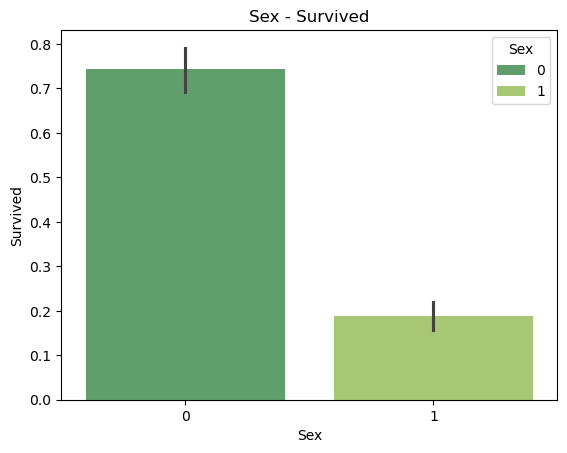

In [27]:
sns.barplot(x='Sex', y='Survived', data=Data, hue='Sex', palette='summer')
plt.title('Sex - Survived')
plt.show();

Гистограмму можно детализировать, добавив значение параметра `hue`.

### Столбец Pclass

Нарисуйте гистограмму выживаемости в зависимости от `Pclass`.  
Используйте `barplot`.

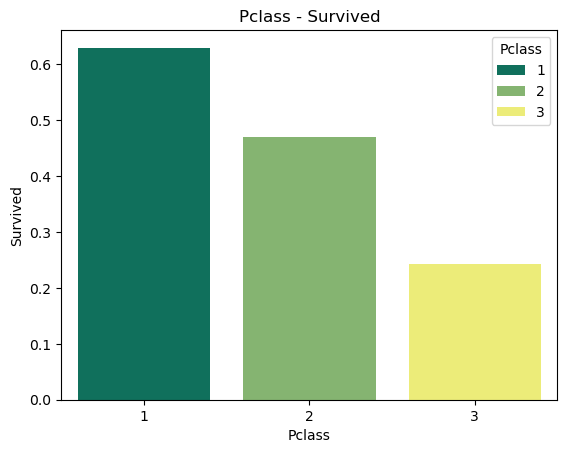

In [28]:
sns.barplot(data=Data, x='Pclass', y='Survived', hue='Pclass', palette='summer', errorbar=None)
plt.title('Pclass - Survived')
plt.show();

**Вопрос:** пассажиры из какого класса выживали чаще всего?

Посмотрим, как влияет пол человека и класс билета (`Pclass`) на выживаемость

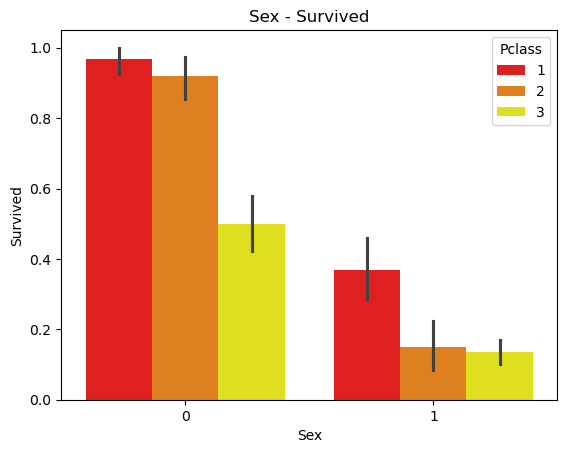

In [29]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show();

### Столбец Embarked

**Вопрос** сколько различных значений принимает признак `Embarked`?

In [30]:
Data['Embarked'].nunique()

3

Пока что мы не обсуждали, как переводить в числа категориальные признаки с больше, чем двумя категориями.  
Поэтому давайте отбросим этот признак.

Сделайте это (вам пригодится метод [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)).

In [31]:
del Data['Embarked']

In [32]:
Data.shape

(886, 11)

### Столбец Age

Обработаем признак `Age`.

Мы помним, что в этом признаке много пропусков.

Заполним пропуски медианным значением `Age`.

In [33]:
median_age = Data['Age'].median()

Data['Age'] = Data['Age'].fillna(median_age)

Нарисуем распределение возраста пассажиров.

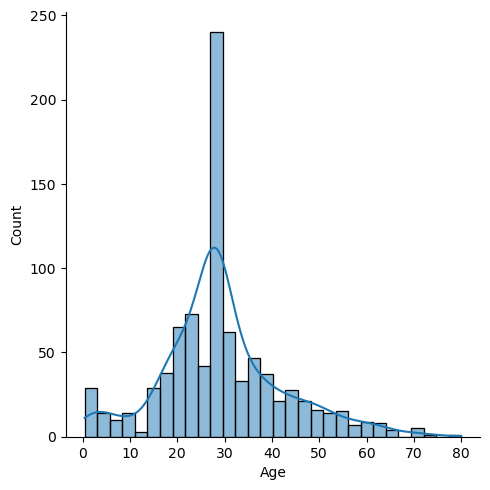

In [34]:
sns.displot(Data['Age'], kde=True)
plt.show();

### Другие столбцы

Удалите признак `Fare`. Он сильно связан с признаком `Pclass`, поэтому нам не нужен.

In [35]:
Data = Data.drop('Fare', axis=1)

**Вопрос:** сколько на данный момент колонок в таблице `Data`?

Столбец `PassengerId` является категориальным и не несёт важной информации, удалите его.

Столбцы `Ticket`, `Name` и `Cabin` в этот раз нам также не понадобятся. Удалите и их.

In [36]:
Data.drop(columns=['PassengerId', 'Ticket', 'Name', 'Cabin'], inplace=True)

После минимальной обработки данных у нас получилась следующая таблица:

In [37]:
Data.head()

Survived  Pclass  Sex   Age  SibSp  Parch
0         0       3    1  22.0      1      0
1         1       1    0  38.0      1      0
2         1       3    0  26.0      0      0
3         1       1    0  35.0      1      0
4         0       3    1  35.0      0      0

## Исследование признаков

Нарисуйте матрицу корреляций столбцов между собой.

In [38]:
Data.corr()

Survived    Pclass       Sex       Age     SibSp     Parch
Survived  1.000000 -0.338447 -0.545547 -0.062245 -0.033743  0.085753
Pclass   -0.338447  1.000000  0.133972 -0.342216  0.083148  0.015606
Sex      -0.545547  0.133972  1.000000  0.081486 -0.114677 -0.259232
Age      -0.062245 -0.342216  0.081486  1.000000 -0.235465 -0.177241
SibSp    -0.033743  0.083148 -0.114677 -0.235465  1.000000  0.422104
Parch     0.085753  0.015606 -0.259232 -0.177241  0.422104  1.000000

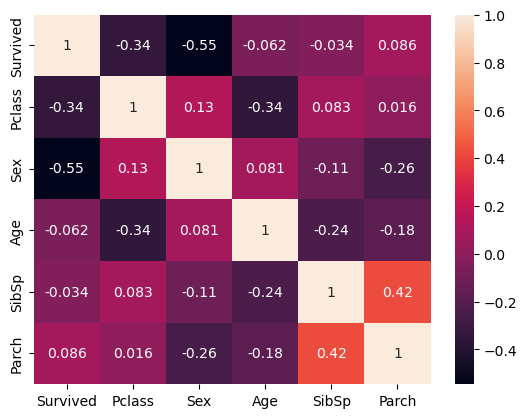

In [39]:
sns.heatmap(data=Data.corr(), annot=True)
plt.show();

**Вопрос:** какой столбец сильнее всего коррелирует с целевой переменной `Survived`?

Посмотрим на попарные зависимости некоторых признаков.

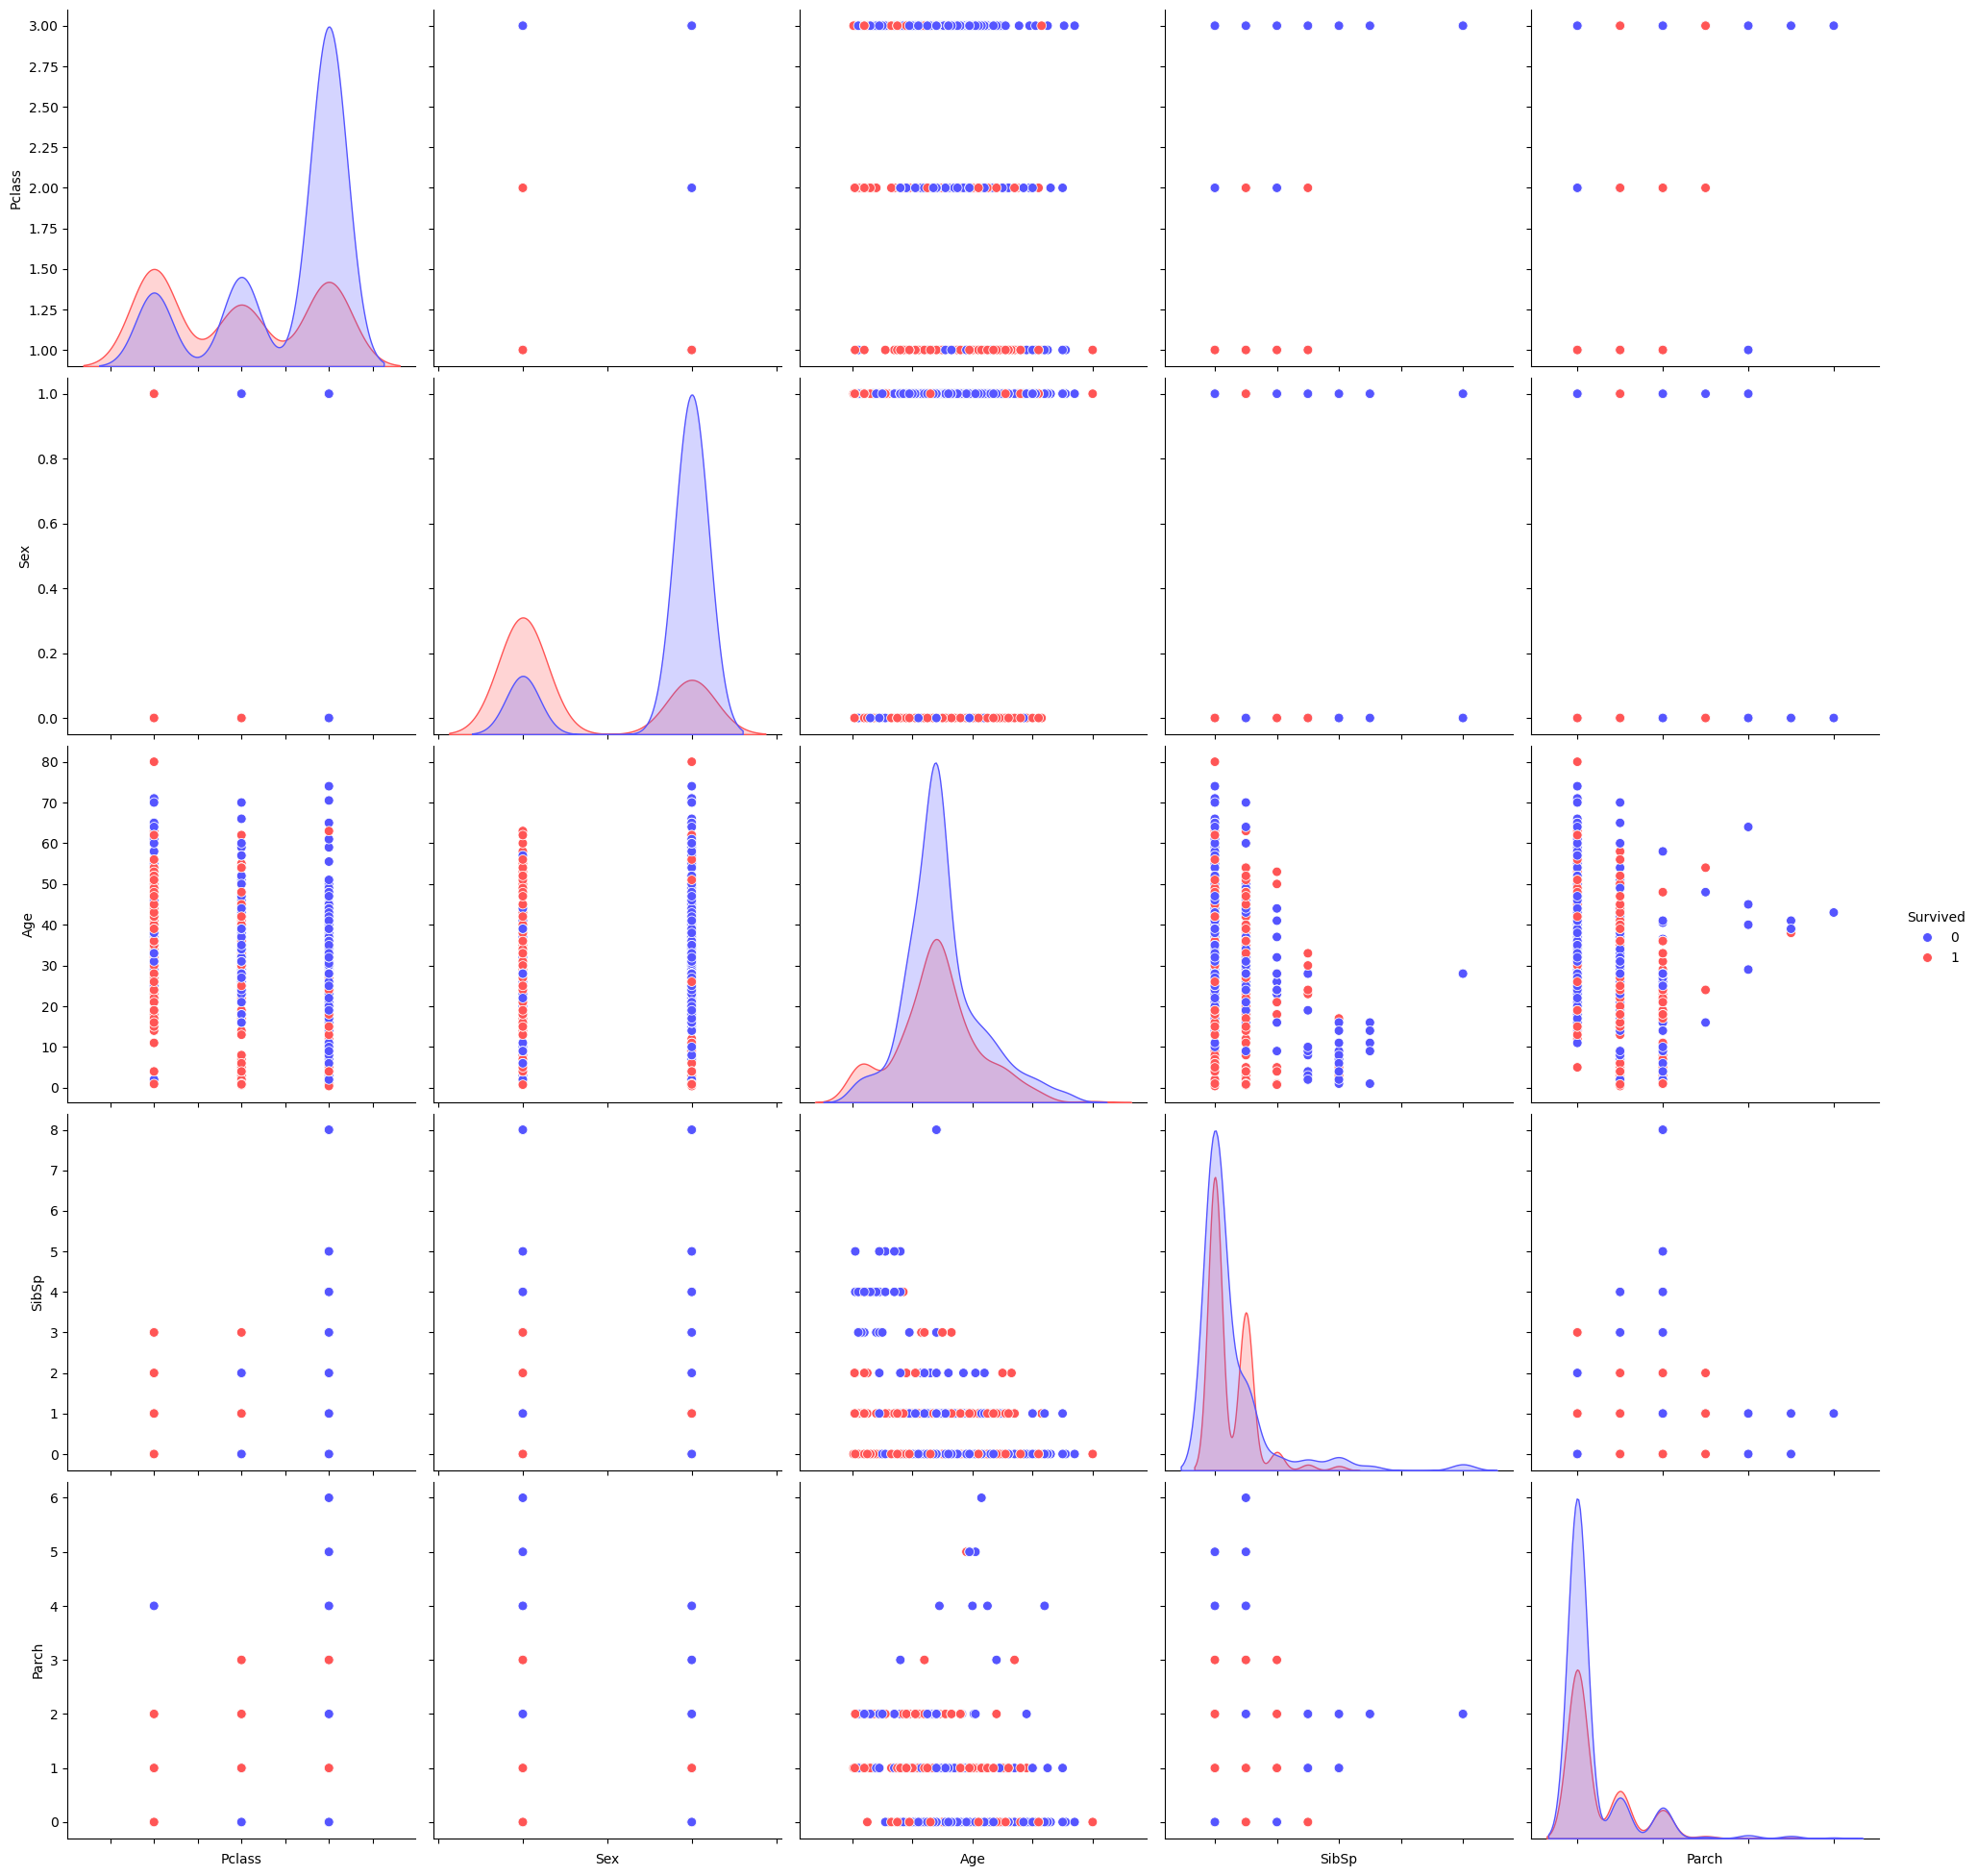

In [40]:
g = sns.pairplot(
    Data,
    hue='Survived',
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )

g.set(xticklabels=[]);

## Бонус (не проверяется)

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Можно сконструировать новые признаки, чтобы решить эти вопросы.

Попробуйте сделать следующее.

1) Создайте признак `NameLen` и запишите в него длину имени (`Name`).

2) Создайте признак `FamilySize`, равный *Parch + SibSp + 1*. Зачем добавлять 1?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

In [41]:
Data.head()

Survived  Pclass  Sex   Age  SibSp  Parch
0         0       3    1  22.0      1      0
1         1       1    0  38.0      1      0
2         1       3    0  26.0      0      0
3         1       1    0  35.0      1      0
4         0       3    1  35.0      0      0

In [42]:
# ваш код здесь

Посмотрите, как коррелируют новые признаки со столбцом `Survived`.

In [43]:
# ваш код здесь

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков.

Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [44]:
# ваш код здесь

Мы провели  однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет.

Мы видим, что больше всего на выживаемость влияет пол пассажира.


### Наша собственная модель

Напишем свою модель, предсказывающую выживаемость только по признаку `Sex`.

In [45]:
def prediction(x):
    if x.Sex == 1:
        return 0
    return 1

Посчитаем долю правильных ответов нашей модели.

In [46]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)

0.7878103837471784

# 2.7  Домашнее задание - 1

## Описание задачи и загрузка данных

В этом задании вам нужно обучить линейную регрессию для предсказания стоимости домов в Калифорнии.

Загружаем необходимые библиотеки.

In [47]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

Фиксируем `random_state` для воспроизводимости случайных значений.

In [48]:
RANDOM_STATE = 42

Загрузим данные и сформируем из них матрицу объект-признак `X` и вектор `y`, содержащий целевую переменную.

In [49]:
Data = fetch_california_housing(as_frame=True)

X = Data['data']
y = Data['target']

Посмотрим первые пять записей набора данных.

In [50]:
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

## Задание 1

 Сколько строк и столбцов в матрице `X`?

In [51]:
X.shape

(20640, 8)

Посмотрим на зависимость стоимости домов (целевой переменной `y`) от признака `MedInc` (`Median Income`).
Для этого можно нарисовать диаграмму рассеяния.

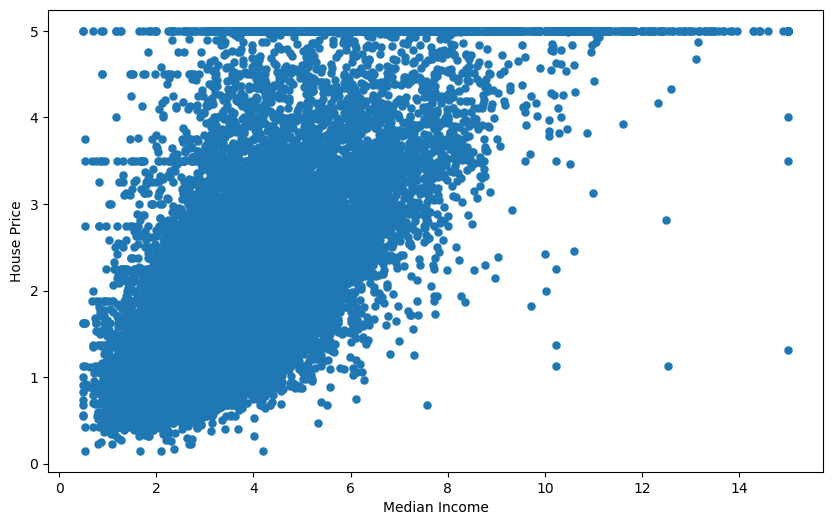

In [52]:
plt.figure(figsize=[10, 6])
plt.scatter(X['MedInc'], y, linewidths=0.1)
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show();

По диаграмме видно, что чем больше `Median Income`, тем больше `House Price`, то есть видна прямая зависимость целевой переменной от признака `MedInc`.

## Задание 2

Постройте диаграмму рассеяния, отображающую зависимость целевой переменной от признака `Latitude`.
Какая это зависимость?

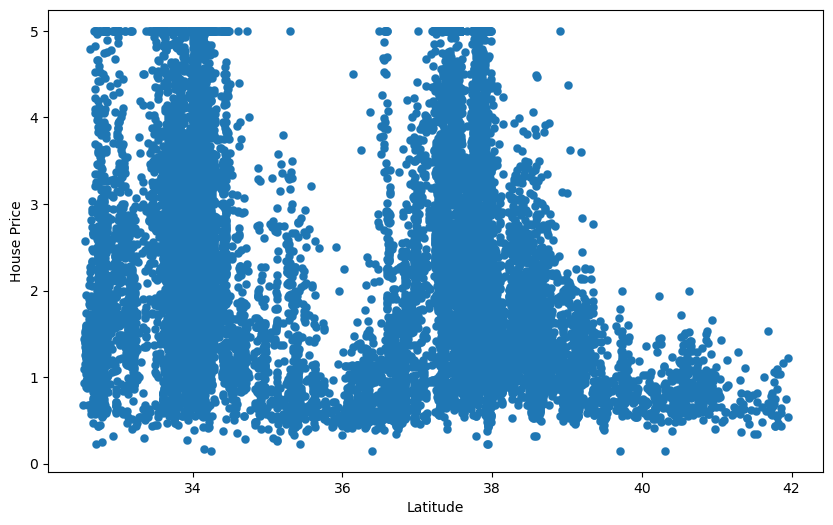

In [53]:
plt.figure(figsize=[10, 6])
plt.scatter(X['Latitude'], y, linewidths=0.1)
plt.xlabel('Latitude')
plt.ylabel('House Price')
plt.show();

Ещё немного поисследуем данные. Полноценный разведочный анализ в рамках этого задания, конечно, не провести, но какие-то инструменты мы потрогаем.

Давайте построим тепловую карту корреляций.

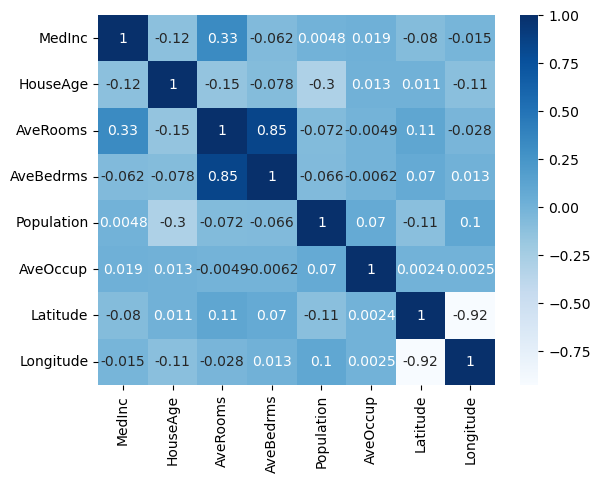

In [54]:
corr = X.corr()
sb.heatmap(corr, cmap="Blues", annot=True);

По этой матрице корреляций видно, что два наиболее зависимых признака - это `AveRooms` и `AveBedrms`.

Но интереснее посмотреть, какой признак имеет наибольшую корреляцию с целевой переменной!

## Задание 3

Добавьте к матрице `X` столбец `y` и постройте матрицу корреляций.
Какой признак имеет наибольшую по модулю корреляцию с таргетом?
После выполнения задания удалите добавленный столбец `y` из матрицы `X`.

In [55]:
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

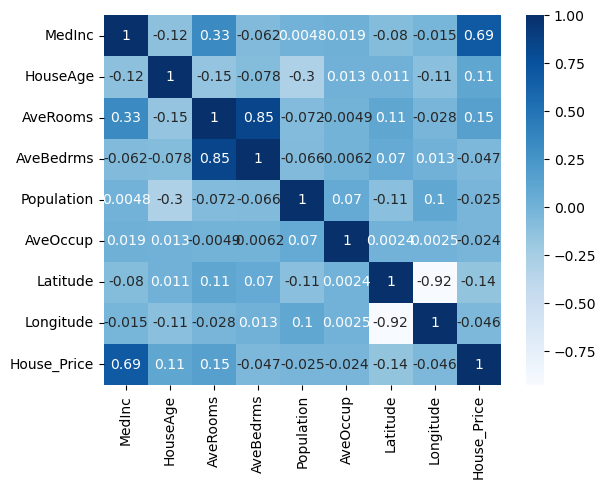

In [56]:
df = X.copy()
df.insert(df.shape[1], 'House_Price', y)
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show();

In [57]:
df.corr().sort_values('House_Price')

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
House_Price  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  House_Price  
Latitude     1.000000  -0.924664    -0.144160  
AveBedrms    0.069721   0.013344    -0.046701  
Longitude   -0.924664   1.000000    -0.045967  
Population  -0.108785   0.099773    -0.024650  
AveOccup     0.002366   0.002476    -0.023737  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
MedInc      -0.079809  -0.015176     0.688075  
House_Price -0.144160  -0.045967     1.000000

Разбейте данные на тренировочную и тестовую часть (в тест отправьте 25% данных).

In [58]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

##Задание 4

Сколько объектов попали в тест?

In [59]:
Xtest.shape

(5160, 8)

Обучите линейную регрессию с параметрами по умолчанию на тренировочных данных и сделайте предсказание на тестовых данных.

In [60]:
# ваш код здесь
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()
linreg_model.fit(Xtrain, ytrain)

LinearRegression()

In [61]:
# ваш код здесь
ypred = linreg_model.predict(Xtest)
ypred[:10]

array([0.9916512 , 3.14665437, 0.90343191, 2.62514049, 2.5251869 ,
       4.54613535, 2.33104783, 2.13560201, 1.95866844, 2.27380129])

## Задание 5

Вычислите значение метрики *MSE* на тестовых данных.
Ответ округлите до десятых.

In [62]:
from sklearn.metrics import mean_squared_error

round(mean_squared_error(ytest, ypred), 1)

0.5

# 3.1 Линейная регрессия

Будем решать задачу регрессии - предсказывать стоимость домов в Калифорнии.

In [63]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

Загрузим данные.

In [64]:
Data = fetch_california_housing(as_frame=True)

X = Data['data']
y = Data['target']

In [65]:
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [66]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Обучим модель линейной регрессии на исходных данных.

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [68]:
model = LinearRegression()

model.fit(Xtrain, ytrain)

pred = model.predict(Xtest)

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

mean_squared_error(ytest, pred) ** 0.5

0.7191618919168988

In [70]:
mean_absolute_percentage_error(ytest, pred)

0.3176077264491388

In [71]:
r2_score(ytest, pred)

0.6084894478131672

Добавим полиномиальные признаки второй степени:

$$1, x_1, x_2 \to 1, x_1, x_2, x_1^2, x_2^2, x_1x_2.$$

In [72]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2)

pf.fit(Xtrain)

Xtrain_new = pf.transform(Xtrain)
Xtest_new = pf.transform(Xtest)

In [73]:
Xtrain_new[:1].shape

(1, 45)

Обучим на обогащенных признаках модель.

In [74]:
model.fit(Xtrain_new, ytrain)

pred2 = model.predict(Xtest_new)

In [75]:
mean_squared_error(ytest, pred2) ** 0.5

0.7589871738790778

In [76]:
mean_absolute_percentage_error(ytest, pred2)

0.27410443772819154

In [77]:
r2_score(ytest, pred2)

0.5639271853844976

In [78]:
Xtrain_new.shape

(15480, 45)

Ошибка уменьшилась!

# 3.6  Домашнее задание - 2

## Описание задачи и загрузка данных

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [80]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

Посмотрим на типы столбцов.

In [81]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание 1

Есть ли в наборе данных пропущенные значения? Если да, удалите их.

Также выведите на экран число пропусков в каждом столбце.

In [82]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Задача 2

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)?  
Если да, то удалите их.

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [84]:
data.drop('Unnamed: 0', axis=1, inplace=True)

### Задание 3

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

In [85]:
corr = data.corr(numeric_only=True)
corr.sort_values('price')

carat     depth     table     price         x         y         z
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249

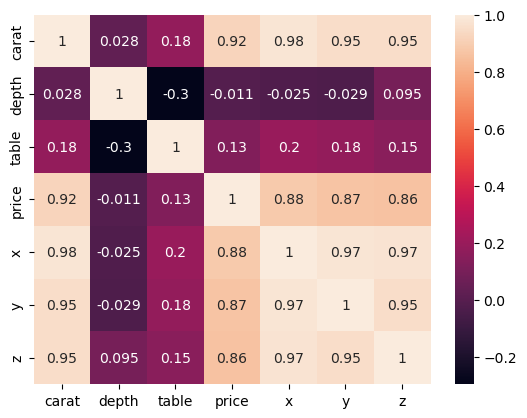

In [86]:
sns.heatmap(data=corr, annot=True)
plt.show();

### Задание 4

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

*P.S. Числовые столбцы оставляем в таблице без изменений.*

In [87]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [88]:
categorical = [col for col in data.columns if data[col].dtype == 'object']
print(categorical)

data = pd.get_dummies(data=data, columns=categorical, drop_first=True)

data.head()

['cut', 'color', 'clarity']


carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43     False       True   
1   0.21   59.8   61.0    326  3.89  3.84  2.31     False      False   
2   0.23   56.9   65.0    327  4.05  4.07  2.31      True      False   
3   0.29   62.4   58.0    334  4.20  4.23  2.63     False      False   
4   0.31   63.3   58.0    335  4.34  4.35  2.75      True      False   

   cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0        False  ...    False    False    False       False        False   
1         True  ...    False    False    False       False         True   
2        False  ...    False    False    False       False        False   
3         True  ...    False     True    False       False        False   
4        False  ...    False    False     True       False        False   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0         True        False        False         False         False  
1        False        False        False         False         False  
2        False         True        False         False         False  
3        False        False         True         False         False  
4         True        False        False         False         False  

[5 rows x 24 columns]

In [89]:
data.shape

(53940, 24)

### Задание 5

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`. Также создайте вектор `y`, содержащий целевую переменную `price`.

In [90]:
X = data.drop('price', axis=1)
y = data['price']

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`.

При разбиении укажите `random_state = 42`.

In [91]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

### Задание 6

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему.

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [93]:
scaler.fit(Xtrain)
Xtrain_scale = scaler.transform(Xtrain)
Xtest_scale = scaler.transform(Xtest)

### Задание 7

Обучите линейную регрессию на тренировочной выборке. Выведите *r2-score* на тренировочной и тестовой выборках.

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linreg_model = LinearRegression()
linreg_model.fit(Xtrain_scale, ytrain)

ypred = linreg_model.predict(Xtest_scale)

r2_score(ytest, ypred)

0.9201866914388087

### Задание 8

Выведите на экран веса, которые линейная регрессия присвоила признакам.

Какой признак имеет наибольший отрицательный вес? (наибольший по модулю среди всех отрицательных весов)

In [95]:
features = Xtrain.columns
weights = linreg_model.coef_
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights.sort_values('Weight')

Feature       Weight
3               x -1100.418850
15        color_J  -529.449216
14        color_I  -442.783567
13        color_H  -362.002300
12        color_G  -202.863564
11        color_F  -104.560993
1           depth   -90.173817
10        color_E   -83.640021
2           table   -60.332280
5               z   -34.258945
4               y    -6.458917
6        cut_Good   170.602933
9   cut_Very Good   310.654256
8     cut_Premium   339.239204
7       cut_Ideal   414.369515
16     clarity_IF   975.933641
18    clarity_SI2  1042.921215
21   clarity_VVS1  1284.809475
22   clarity_VVS2  1461.034194
17    clarity_SI1  1611.571681
19    clarity_VS1  1670.318496
20    clarity_VS2  1817.664208
0           carat  5338.615671

## Попытка улучшить качество модели

Данная часть является творческой, и задания в ней немного сложнее, чем предыдущие.

Следующие вопросы не проверяются тестами.

### Задание 9

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [96]:
drop_col = ['y', 'table', 'depth']
Xtrain = Xtrain.drop(drop_col, axis=1)
Xtest = Xtest.drop(drop_col, axis=1)

In [97]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)

pf.fit(Xtrain)

PolynomialFeatures()

In [98]:
Xtrain_new = pf.transform(Xtrain)
Xtest_new = pf.transform(Xtest)

In [99]:
scaler = StandardScaler()
scaler.fit(Xtrain_new, ytrain)
Xtrain_scale = scaler.transform(Xtrain_new)
Xtest_scale = scaler.transform(Xtest_new)

In [100]:
linreg_model.fit(Xtrain_scale, ytrain)

ypred = linreg_model.predict(Xtest_scale)
r2_score(ypred, ytest)

0.9681130853544163

In [101]:
features = Xtrain.columns
weights = linreg_model.coef_[0]
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights.sort_values('Weight')

Feature        Weight
0           carat -2.076017e-13
17    clarity_VS2 -2.076017e-13
16    clarity_VS1 -2.076017e-13
15    clarity_SI2 -2.076017e-13
14    clarity_SI1 -2.076017e-13
13     clarity_IF -2.076017e-13
12        color_J -2.076017e-13
11        color_I -2.076017e-13
10        color_H -2.076017e-13
9         color_G -2.076017e-13
8         color_F -2.076017e-13
7         color_E -2.076017e-13
6   cut_Very Good -2.076017e-13
5     cut_Premium -2.076017e-13
4       cut_Ideal -2.076017e-13
3        cut_Good -2.076017e-13
2               z -2.076017e-13
1               x -2.076017e-13
18   clarity_VVS1 -2.076017e-13
19   clarity_VVS2 -2.076017e-13

### Задание 10

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?

# 4.1 Градиентный спуск для функции одной переменной

## Импорт библиотек

In [102]:
import numpy as np
from matplotlib import pyplot as plt

## Практика

Найдем локальный минимум функции $f(x)=x^3-5x+2$ методом градиентного спуска.

Сначала определим функцию.

In [103]:
def f(x):
   return x**3 - 5*x + 2

Построим график функции.

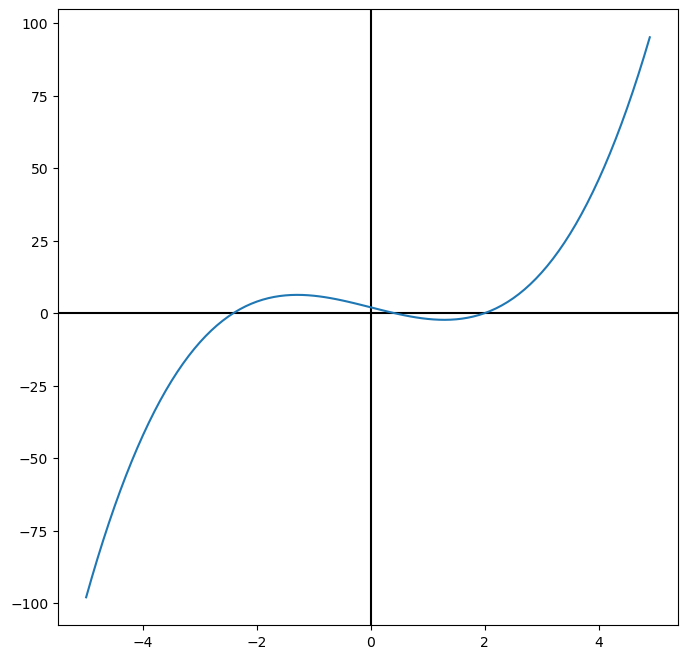

In [104]:
x_values = [x for x in np.arange(-5, 5, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(8,8))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')
plt.plot(x_values, f_values)
plt.show();

Вычислим производную функции $f(x)$:

$f'(x)=3x^2-5$.



In [105]:
import sympy as sp

x = sp.Symbol('x')
fx = x**3 - 5*x + 2
fx_diff = sp.diff(fx, x)
f = sp.lambdify(x, fx_diff)
display(fx_diff)

f(2)

3*x**2 - 5

7

In [106]:
def grad_f (x):
    return 3*(x**2) - 5

Теперь реализуем метод в виде функции.

In [107]:
def gradient_descent(x_start, learning_rate, epsilon, num_iterations):
    x_curr = x_start

    for i in range(num_iterations):
      x_new = x_curr - learning_rate * grad_f(x_curr)

      if abs(x_new - x_curr) < epsilon:
        return x_curr

      x_curr = x_new

    return x_curr

Попробуем стартовать из точки $x_0 = 4$ и идти с маленьким шагом $\eta = 0.01$.

In [108]:
x0 = 4
eta = 0.01
epsilon = 0.001
iterations = 10000

x_res = gradient_descent(x0, eta, epsilon, iterations)
x_res

1.3036113611507372

Отметим найденную точку на графике.

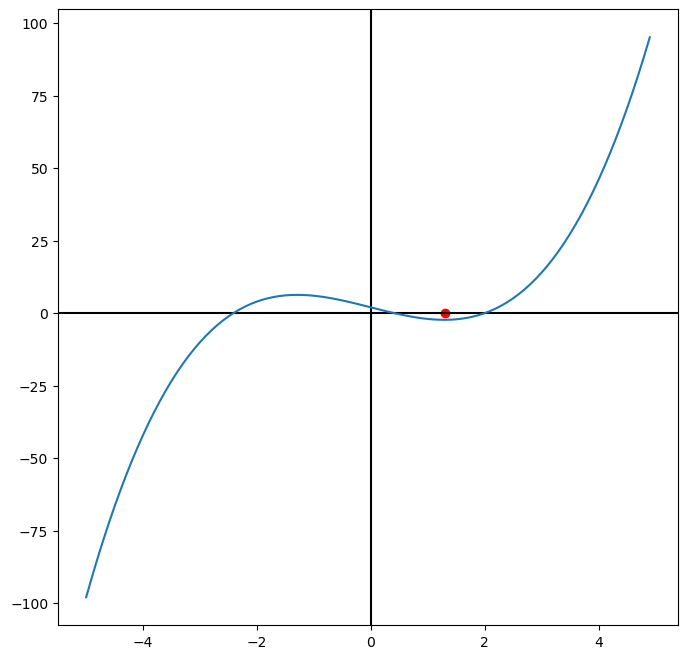

In [109]:
plt.figure(figsize=(8,8))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')
plt.plot(x_values, f_values)

plt.scatter(x_res, f(x_res), marker='o', c='red')
plt.show();

In [110]:
# Найдите минимум функции x**4 - 10*x + 3

# Ищите минимум с гиперпараметрами:
# x0 = 5
# n = 0.01
# epsilon = 0.001
# num_iterations = 10000

# Чему равен найденное методом значение x (локальный минимум)?
# Ответ округлите до сотых.

x0 = 5
n = 0.01
epsilon = 0.001
num_iterations = 10000

def f(x):
   return x**4 - 10*x + 3

x = sp.Symbol('x')
expr = x**4 - 10*x + 3
expr_diff = expr.diff(x)
grad_f = sp.lambdify(x, expr_diff)

def gradient_descent(x_start, step, wrong, n_iterations):
    x_curr = x_start

    for _ in range(n_iterations):
        x_new = x_curr - grad_f(x_curr) * step
        
        if abs(x_new - x_curr) < wrong:
            return x_curr
    
        x_curr = x_new

    return x_curr

res = round(gradient_descent(x0, n, epsilon, num_iterations), 2)
res

1.35

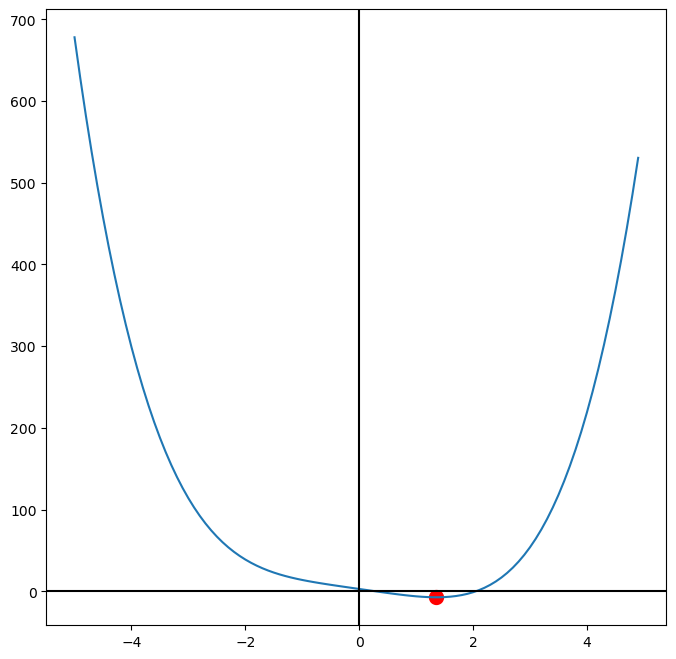

In [111]:
x_values = [x for x in np.arange(-5, 5, 0.1)]
y_values = [f(x) for x in x_values]

plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values)
plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')
plt.scatter(res, f(res), marker='o', c='r', linewidths=5)

plt.show();

In [112]:
# Пусть метод стартует из точки w_start=(3,1,1). 
# Пусть шаг градиентного спуска η=0.01

# Чему будет равен вес w1 ​после одного шага градиентного спуска?
# Ответ округлите до сотых

x1 = [10, 5, 7]
x2 = [40, 36, 30]
y = [100, 73, 71]
w_start = [3, 1, 1]
n = 0.01

def grad_f(x1, x2, y, w):
    print(f'{x1} * ({w[0]} + {w[1]} * {x1} + {w[2]} * {x2} - {y})')
    print()
    return x1 * (w[0] + w[1] * x1 + w[2] * x2 - y)

def gradient_descent(x1, x2, y, w_start, step):

    Q_w = 0
    
    for i in range(len(y)):
        Q_w += grad_f(x1[i], x2[i], y[i], w_start)

    
    w1 = w_start[1] - (2 / 3 * Q_w) * step

    return w1

res = round(gradient_descent(x1, x2, y, w_start, n), 2)
res

10 * (3 + 1 * 10 + 1 * 40 - 100)

5 * (3 + 1 * 5 + 1 * 36 - 73)

7 * (3 + 1 * 7 + 1 * 30 - 71)



6.55

# 4.2 Градиентный спуск для функции нескольких переменных

## Импорт библиотек

In [113]:
import pandas as pd
import numpy as np

In [114]:
RANDOM_STATE = 42
np.random.RandomState(RANDOM_STATE);

## Практика

Создадим таблицу с обучающими данными.

In [115]:
df = pd.DataFrame({'x1' : [10, 5, 7], 'x2' : [40, 36, 30], 'y' : [100, 73, 71]})
df

x1  x2    y
0  10  40  100
1   5  36   73
2   7  30   71

In [116]:
def prediction(w, x1, x2):
    return w[0] + w[1] * x1 + w[2] * x2

In [117]:
def grad_MSE(w, x1, x2, y):
    dw0 = (2/3) * (w[0] + w[1]*x1 + w[2]*x2 - y)
    dw1 = (2/3) * x1 * (w[0] + w[1]*x1 + w[2]*x2 - y)
    dw2 = (2/3) * x2 * (w[0] + w[1]*x1 + w[2]*x2 - y)

    return np.array([dw0, dw1, dw2])

In [118]:
grad_MSE((1, 1, 1), 10, 40, 100)

array([  -32.66666667,  -326.66666667, -1306.66666667])

In [119]:
def gradient_descent(data, w_start, learning_rate, num_iterations):
    w_curr = w_start

    for i in range(num_iterations):
      GradMSE = np.zeros(3)
      for _, row in data.iterrows():
          x1, x2, y = row
          GradMSE += grad_MSE(w_curr,x1,x2,y)

      w_new = w_curr - learning_rate * GradMSE

      w_curr = w_new

    return w_curr

In [120]:
gradient_descent(df, np.random.rand(3), 0.0001, 5000)

array([0.49600729, 3.94940621, 1.47146513])

# 4.2 Градиентный спуск для функции нескольких переменных (векторная форма)

## Импорт библиотек

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [122]:
RANDOM_STATE = 42
np.random.RandomState(RANDOM_STATE);

## Практика

Обучающие данные.

In [123]:
df = pd.DataFrame({'x1' : [10, 5, 7], 'x2' : [40, 36, 30], 'y' : [100, 73, 71]})
df

x1  x2    y
0  10  40  100
1   5  36   73
2   7  30   71

Реализуем метод градиентного спуска для обучения линейной регрессии.

Сначала напишем функцию для вычисления среднеквадратичной ошибки

$MSE = \frac{1}{m}||Xw - y||^2_2$.

Здесь квадратичная ошибка записана в матричном виде, т.е. $X$ - матрица объект-признак, $w$ - вектор весов модели.
*  $Xw$ - вектор предсказания модели
*  $y$ - вектор правильных ответов,
и квадратичная ошибка - это квадрат нормы разности вектора предсказания и вектора правильных ответов.

Вычислить норму вектора в python можно разными способами.  
Здесь мы  воспользуемся готовой функцией из библиотеку numpy - `numpy.linalg.norm`.

In [124]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

Реализуем градиентный спуск по формуле

$$w_{new} = w_{prev} - \nabla_w Q(w_{prev})$$

Вычислим градиент MSE:
$$\nabla_w Q(w)=\frac2m X^T(Xw-y).$$

Итак, реализуем метод градиентного спуска:

*  первым шагом добавим к матрице `X` единичный столбец - это константный признак, равный 1 на всех объектах.  
Он нужен, чтобы записать предсказание линейной регрессии в виде скалярного произведения и тем самым избавиться от знака суммы:
$a(x)=w_0+w_1x_1+...+w_dx_d=w_1\cdot 1+w_1x_1+...w_dx_d=(w,x)$  
В python скалярное произведение можно записать так: `w@x`

*  затем инициализируем случайным образом вектор весов `params`

*  зададим пустой массив `cost_track`, в который будем записывать ошибку на каждой итерации

*  наконец, в цикле по количеству эпох (итераций) будем обновлять веса по формуле градиентного спуска

In [125]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

Создадим функцию для получения предсказания модели

In [126]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

Применим градиентный спуск

In [127]:
track, weights = gradient_descent(df[['x1','x2']], df['y'], 0.0001, 5000)

print(weights)

[0.85459281 3.94882666 1.46157388]


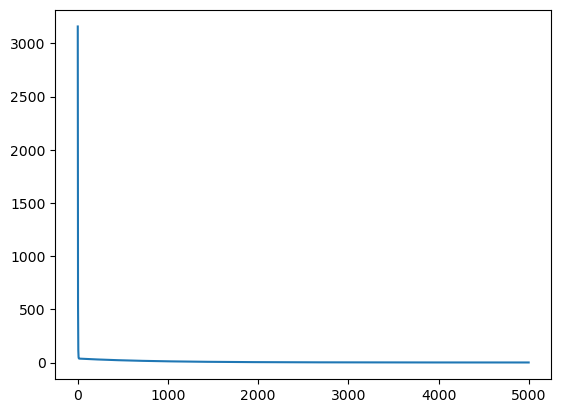

In [128]:
plt.plot(track);

# 4.3 Линейная регрессия: аналитический и численный подходы

## Импорт библиотек, установка константных значений

In [129]:
import numpy as np
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt

In [130]:
RANDOM_STATE = 42
np.random.RandomState(RANDOM_STATE);

## Постановка задачи

Сгенерируем данные для задачи регрессии

In [131]:
X, y = make_regression(n_samples=100, n_features=1, random_state=RANDOM_STATE, noise=10.0, bias=100.0)

Нарисуем сгенерированные данные

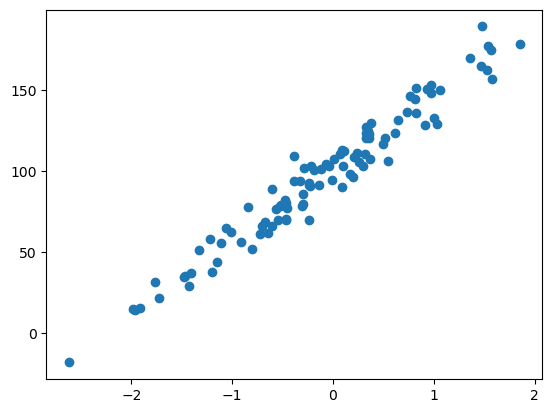

In [132]:
plt.scatter(X, y);

## Аналитический подход

Решим задачу по точной формуле
$$w = (X^TX)^{-1}X^Ty$$

In [133]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

pred_lr = lr.predict(X)

Посчитаем качество предсказания (будем использовать метрику $R^2$) и визуализируем результат.

r2: 0.9538252459635717


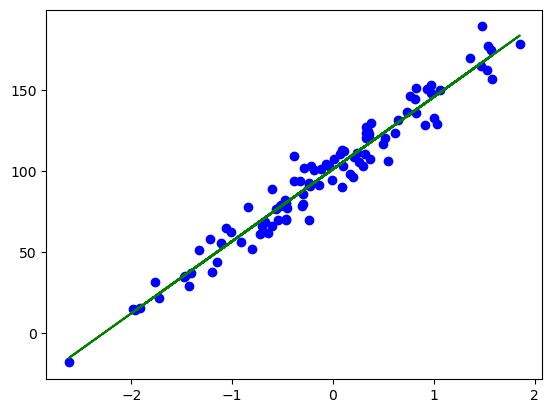

In [134]:
from sklearn.metrics import r2_score

plt.scatter(X, y, c='blue')
plt.plot(X, pred_lr, '-', c='green')

print('r2:',r2_score(y, pred_lr))

## Численный подход

Теперь обучим `SGDRegressor` и сделаем предсказание.

In [135]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(X, y)

pred_sgd = sgd.predict(X)

Добавим предсказание на график с исходными объектами и вычислим $R^2$.

r2: 0.9538243355275065


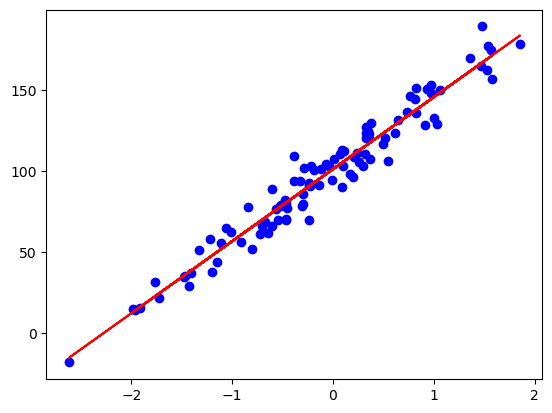

In [136]:
plt.scatter(X, y, c='blue')
plt.plot(X, pred_sgd, '-', c='red')

print('r2:',r2_score(y, pred_sgd))

Сравним качество предсказний точным и численным методами

In [137]:
print('r2 exact:',r2_score(y, pred_lr))
print('r2 numeric:',r2_score(y, pred_sgd))

r2 exact: 0.9538252459635717
r2 numeric: 0.9538243355275065


Численный подход дает чуть меньшее значение метрики качества, но разница в значениях $R^2$  
начинается в шестом знаке после запятой, то есть можно смело считать, что разницы в качестве нет.

# 4.4  Домашнее задание - 3

## Импорт библиотек, установка константных значений

In [138]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [139]:
RANDOM_STATE = 123
TRAIN_SIZE = 0.75

In [140]:
np.random.RandomState(RANDOM_STATE)

RandomState(MT19937) at 0x1F89EB28A40

In [141]:
np.random.seed(RANDOM_STATE)

X, y, _ = make_regression(n_samples=100000,              # число объектов
                          n_features=10,                 # число признаков
                          n_informative=8,               # число информативных признаков
                          noise=100,                     # уровень шума в данных
                          coef=True,                     # значение True используется при генерации данных
                          random_state=RANDOM_STATE)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
# X[10] = X[6] + X[7] + np.random.random()*0.01

## Практика

Реализуем метод градиентного спуска для обучения линейной регрессии.

### Задание 1 (1 балл)


Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле:

$$w = (X^TX)^{-1}X^Ty$$

Комментарий: для поиска решения в векторном виде сначала необходимо добавить единичный столбец к матрице $X$.
Это сделано в коде.

In [142]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    # ваш код здесь

    w = np.linalg.inv(X.T @ X) @ (X.T @ y)
    return w

### Задание 2 (1 балл)

Заполните функцию для предсказания модели по формуле
$$a(X)=Xw$$

In [143]:
def prediction(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    # ваш код здесь
    return X @ w

Продублируем функцию для вычисления значения MSE из урока

In [144]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

### Задание 3

Скопируйте метод градиентного спуска из [урока](https://colab.research.google.com/drive/1Bos0LeQP9AAB-nrS0z8b-8ag5xRSEdty?usp=sharing) в этот ноутбук.


In [145]:
# ваш код здесь
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

### Бонус для отважных

Если чувствуете в себе силы, попробуйте написать SGD сами.

Модифицируйте метод градиентного спуска из урока так, чтобы это теперь был метод стохастического градиентного спуска:

* на каждой итерации выбирайте один случайный индекс `j` при помощи функции `random.randint`

* градиент на каждой итерации градиентного спуска считайте не как сумму градиентов по всем объектам, а только по одному объекту с индексом `j`

* на каждой итерации вычисляйте значение функции потерь и сохраняйте в список `cost_track`, который верните вместе с результатом работы функции

In [146]:
import random

def stochastic_gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    theta = np.random.randn(2, 1) 

    j = 0
    cost_history = []  


    cost_track = np.zeros((iterations,1))

    for i in range(iterations):

        # выберите случайный индекс в диапазон от 0 до len(X)-1 включительно при помощи функции random.randint
        j = random.randint(0, len(X))

        # обновите веса, используя сдвиг по градиенту только по объекту X[j] (делить на m в данном случае не нужно)
        params = params - 2. * learning_rate * X.T * (X @ params - y)
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

- Обучите линейную регрессию тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии ($X, y$). Для GD и самостоятельно написанного SGD используйте `learning_rate = 0.01, iterations = 10000`.

*P.S. Если же вы используете не самописный SGD, а SGDRegressor из библиотеки sklearn.linear_model, то его объявляйте с гиперпараметрами по умолчанию, то есть в скобках при объявлении модели ничего не указывайте.*

- С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (`from sklearn.metrics import r2_score`). Для получения предсказания использовуйте функцию `predict`.


In [147]:
# **План**

# 1 - находим веса одним из методов

# 2 - применяем функцию prediction для получения предсказаний с найденными весами (либо predict в случае использования SGDRegressor из библиотеки sklearn)

# 3 - вычисляем значение метрики r2

In [148]:
w_linreg = ols_solution(X, y)
y_pred_linreg = prediction(X, w_linreg)

In [149]:
linreg_model_2 = LinearRegression()
linreg_model_2.fit(X, y)
y_pred_linreg_2 = linreg_model_2.predict(X)

In [150]:
learning_rate = 0.01
iterations = 10000

cost_track_gd, w_gd = gradient_descent(X, y, learning_rate, iterations)
y_pred_gd = prediction(X, w_gd)

In [151]:
# learning_rate = 0.01
# iterations = 10000

# track, w_sgd = stochastic_gradient_descent(X, y, learning_rate, iterations)
# y_pred_sgd = prediction(X, w_sgd)

## Quiz

Чему равно значение метрики $R^2$ для аналитического подхода?

Ответ округлите до сотых.

In [152]:
sgd = SGDRegressor()
sgd.fit(X, y)
y_pred_sgd = sgd.predict(X)

In [153]:
# LR
from sklearn.metrics import r2_score
print('R^2 func : {:.2}'.format(r2_score(y, y_pred_linreg)))
print('R^2 linreg : {:.2}'.format(r2_score(y, y_pred_linreg_2)))
print('R^2 GD : {:.2}'.format(r2_score(y, y_pred_gd)))
print('R^2 SGD : {:.2}'.format(r2_score(y, y_pred_sgd)))

R^2 func : 0.76
R^2 linreg : 0.76
R^2 GD : 0.76
R^2 SGD : 0.75


## Quiz

Нарисуйте траекторию уменьшения ошибки при обучении градиентного спуска (это параметр `cost_track`, возвращаемый функцией).

Чему приблизительно равен loss модели на последних итерациях?

Выберите наиболее близкий к полученному вами ответ.

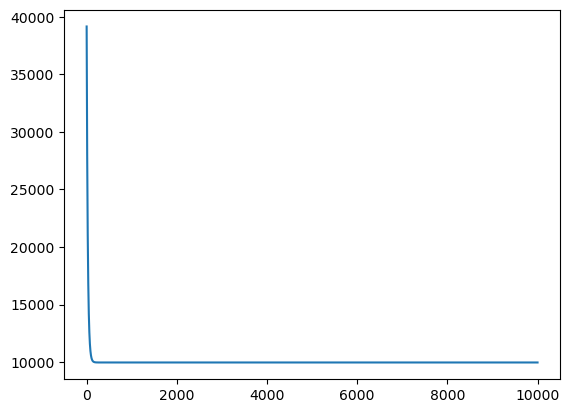

In [154]:
# your code here
plt.plot(cost_track_gd);

In [155]:
# your code for SGD here


## Quiz

Измерьте время работы аналитического подхода, а также GD и SGD (используйте magic command [`%%time`](https://ipython.readthedocs.io/en/stable/interactive/magics.html)).

Упорядочите результаты по возрастанию.

## Тестирование моделей на реальных данных

В реальных задачах никто не пишет методы с нуля, если они уже реализованы в python. Самостоятельная реализация методов полезна для получения навыков программирования и более глубокого понимания алгоритмов.

Давайте применим уже готовые методы из `sklearn` для решения задачи регрессии.

In [156]:
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

Разобъем данные на трейн и тест

In [157]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE
    )

Для решения этой задачи попробуйте следующие модели:

* `LinearRegression` из `sklearn`
* `SGDRegressor` из `sklearn`

Обучите модели на тренировочных данных с параметрами по умолчанию и сделайте предсказание на тесте.
Вычислите значение $R^2$

In [158]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
y_pred_linreg = linreg_model.predict(X_train)

sgd_model = SGDRegressor(penalty=None, learning_rate='constant', eta0=0.005, max_iter=100000)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_train)

In [159]:
print('R^2 linreg : {:.2}'.format(r2_score(y_train, y_pred_linreg)))
print('R^2 SGD : {:.2}'.format(r2_score(y_train, y_pred_sgd)))

R^2 linreg : 0.61
R^2 SGD : -1e+31


In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

## Quiz

Чему равно значение $R^2$ для модели LinearRegression на тестовых данных?

Ответ округлите до сотых.

In [161]:
# ваш код здесь (SGD Regressor)
...

## Quiz

Какая модель с параметрами по умолчанию лучше справилась с предсказанием стоимости домов в Калифорнии?

## Quiz

Проинтерпретируйте качество метода SGDRegressor. Выберите наиболее подходящий вариант.

# 5.1 Классификация

# Бинарные классификаторы

## Импорт библиотек

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Функция потерь

Бинарный линейный классификатор делает предсказание по формуле
$$a(x) = (w,x).$$

А вот функции потерь у разных классификаторов разные.

*  Функция потерь логистической регрессии:

$$
Q_{LR}(X, w) = -\frac{1}{\ell} \sum_{i=1}^{\ell} [y_i = 1]\log\sigma(\langle x_i, w \rangle) + [y_i = -1]\log(1-\sigma(\langle x_i, w \rangle),
$$
где $\sigma(z)=\frac1{1+e^{-z}}$.


Эта функция называется log-loss.

*  Функция потерь метода опорных векторов:

$$
Q_{SVM}(X, w) = C\sum_{i=1}^{l} \max\{0, 1 - y_i(\langle x_i, w\rangle)\} + \|w\|^2 \to \min_w,
$$
где $C$ - гиперпараметр.

Рассмотрим свойства логистической регрессии и метода опорных векторов на примере классического набора данных ["Ирисы Фишера"](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Этот набор состоит из 150 наблюдений, каждое из которых представляет собой четыре измерения: длина наружной доли околоцветника (`sepal length`), ширина наружной доли околоцветника (`sepal width`), длина внутренней доли околоцветника (`petal length`), ширина внутренней доли околоцветника (`petal width`). Каждое наблюдение относится к одному из трёх классов ириса: `setosa`, `versicolor` или `virginica`.

Задача состоит в том, чтобы по измерениям предсказать класс цветка.

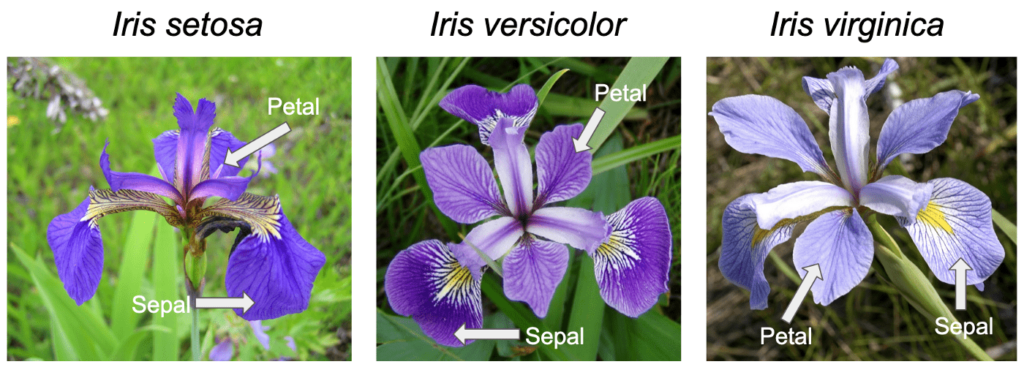

## Обзор данных

In [163]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [164]:
set(y)

{0, 1, 2}

## Задача

Перейдём к задаче бинарной классификации: будем предсказывать принадлежность цветка к виду `versicolor` против принадлежности ко всем прочим видам. Перекодируем целевую переменную так, чтобы цветки вида `versicolor` имели метку 1, а прочих видов – метку 0.

In [165]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [166]:
y[y != 1] = 0

y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Наши следующие действия:

*  Будем работать с двумя признаками: `sepal length (cm)` и `sepal width (cm)`. Сделаем из  них в отдельную матрицу.
*  Отмасштабируем выборки при помощи StandardScaler.
*  Построим диаграмму рассеяния по тренировочной выборке и убедимся, что данные линейно не разделимы.

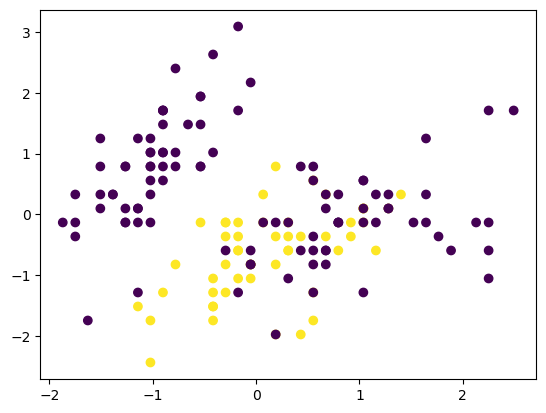

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(123)

X = X[['sepal length (cm)', 'sepal width (cm)']]

ss = StandardScaler()
X = ss.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c = y);

Обучим логистическую регрессию и метод опорных векторов на тренировочной выборке и убедимся, что полученные веса различаются.

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

lr = LogisticRegression()
lr.fit(X, y)

svm = LinearSVC()
svm.fit(X, y)

print(lr.coef_)
print(svm.coef_)

[[ 0.1033129  -1.29975427]]
[[ 0.02577291 -0.52074853]]


Теперь посмотрим, как различаются решающие поверхности алгоритмов.

Код ниже построит решающие поверхности для классификаторов.

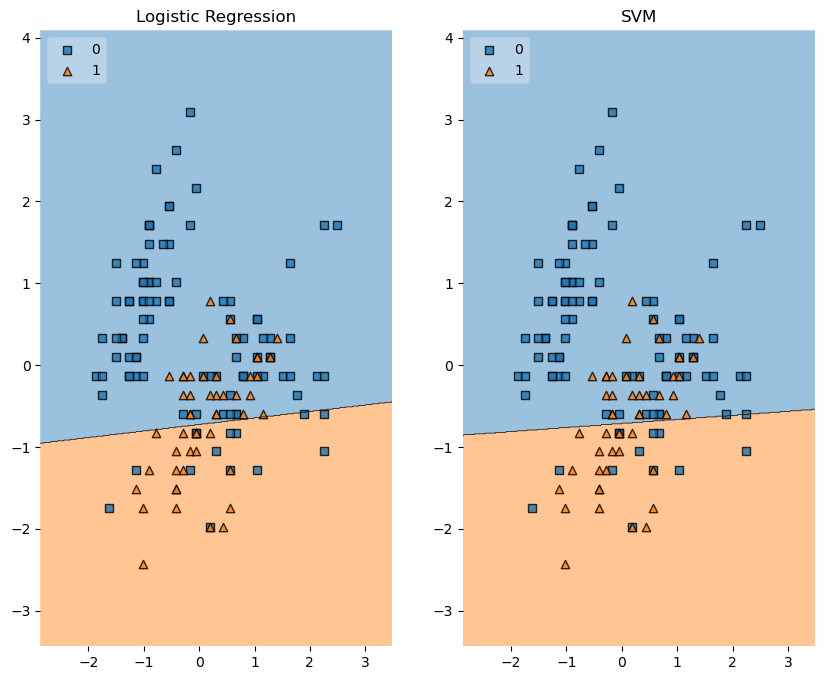

In [169]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'SVM']
for clf, lab, grd in zip([lr, svm],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=np.array(y), clf=clf, legend=2)
    plt.title(lab)

plt.show();

In [170]:
-np.log2(0.5)

1.0

# 5.2 Логистическая регрессия

Обучим логистическую регрессию для предсказания того, откликнется клиент  
на рекламное предложение (target = 1) или нет (target = 0).

In [171]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [172]:
# считаем данные
data = pd.read_csv('data/clients_data.csv')

In [173]:
data.head()

AGE  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  GENDER  CHILD_TOTAL  DEPENDANTS  \
0   49                  1                  0       1            2           1   
1   32                  1                  0       1            3           3   
2   52                  1                  0       1            4           0   
3   39                  1                  0       1            1           1   
4   30                  1                  0       0            0           0   

   PERSONAL_INCOME  LOAN_NUM_TOTAL  LOAN_NUM_CLOSED  LOAN_DLQ_NUM  TARGET  
0           5000.0               1                1             2       0  
1          12000.0               1                1             1       0  
2           9000.0               2                1             0       0  
3          25000.0               1                1             3       0  
4          12000.0               2                1             2       0

In [174]:
from sklearn.model_selection import train_test_split

X = data.drop('TARGET', axis=1)
y = data['TARGET']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=123)

Обучим логистическую регрессию с параметрами по умолчанию.

In [175]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [176]:
lr.fit(Xtrain, ytrain)

prediction = lr.predict(Xtest)

In [177]:
prediction[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Посмотрим на долю правильных ответов модели.

In [178]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, prediction)

0.8767243266914824

Теперь предскажем вероятности классов с помощью обученной логистической регрессии на тестовых данных.

In [179]:
probs_test = lr.predict_proba(Xtest)

probs_test[:10]

array([[0.93859981, 0.06140019],
       [0.90059017, 0.09940983],
       [0.71082708, 0.28917292],
       [0.78458641, 0.21541359],
       [0.87089413, 0.12910587],
       [0.95850985, 0.04149015],
       [0.93632296, 0.06367704],
       [0.96561737, 0.03438263],
       [0.94889178, 0.05110822],
       [0.93091158, 0.06908842]])

У обученной модели можно посмотреть веса (как и в линейной регрессии).  
Выведем на экран веса модели (`model.coef_`, `model.intercept_`).

In [180]:
lr.coef_, lr.intercept_

(array([[-4.61791123e-02, -1.47046760e-01, -8.61083355e-02,
         -1.54071068e-01,  1.91465578e-01, -1.41670349e-01,
          2.01714945e-05, -6.01051754e-02, -2.31264088e-01,
          2.92920989e-01]]),
 array([-0.24167028]))

# Задание по Логистической регрессии

Обучим логистическую регрессию для предсказания того, откликнется клиент  
на рекламное предложение (target = 1) или нет (target = 0).

## Подлючение библиотек, загрузка и обзор данных

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [182]:
data = pd.read_csv('data/clients_data.csv')

In [183]:
data.head()

AGE  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  GENDER  CHILD_TOTAL  DEPENDANTS  \
0   49                  1                  0       1            2           1   
1   32                  1                  0       1            3           3   
2   52                  1                  0       1            4           0   
3   39                  1                  0       1            1           1   
4   30                  1                  0       0            0           0   

   PERSONAL_INCOME  LOAN_NUM_TOTAL  LOAN_NUM_CLOSED  LOAN_DLQ_NUM  TARGET  
0           5000.0               1                1             2       0  
1          12000.0               1                1             1       0  
2           9000.0               2                1             0       0  
3          25000.0               1                1             3       0  
4          12000.0               2                1             2       0

In [184]:
from sklearn.model_selection import train_test_split

X = data.drop('TARGET', axis=1)
y = data['TARGET']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=123)

## Практика

**Задание**  
Выведите на экран количество объектов каждого класса. Сколько процентов объектов относятся к положительному классу?  
Ответ округлите до целого числа (например, если доля объектов положительного класса равна 0.412, в ответ запишите 41,  
имея в виду 41 процент).

In [185]:
# ваш код здесь
y.value_counts(normalize=True).round(2) * 100

TARGET
0    88.0
1    12.0
Name: proportion, dtype: float64

Обучим логистическую регрессию с параметрами по умолчанию.

In [186]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [187]:
lr.fit(Xtrain, ytrain)

prediction = lr.predict(Xtest)

Метрику accuracy не стоит использовать при сильном дисбалансе классов. Поэтому посчитайте f1_score для оценки качества модели на тестовых данных.

f1_score принимает значения от 0 до 1. Чем ближе к 1, тем лучше модель.

In [188]:
from sklearn.metrics import f1_score

# ваш код здесь
f1_score(ytest, prediction)

0.0

**Вопрос**  
Чему равен `f1_score`?

Удивительно, да?

Давайте разберемся, почему качество такое низкое.

Предскажем вероятности классов с помощью обученной логистической регрессии на тестовых данных.

In [189]:
probs_test = lr.predict_proba(Xtest)

probs_test[:10]

array([[0.93859981, 0.06140019],
       [0.90059017, 0.09940983],
       [0.71082708, 0.28917292],
       [0.78458641, 0.21541359],
       [0.87089413, 0.12910587],
       [0.95850985, 0.04149015],
       [0.93632296, 0.06367704],
       [0.96561737, 0.03438263],
       [0.94889178, 0.05110822],
       [0.93091158, 0.06908842]])

По вероятностям видно, что вероятности отнесения к положительному классу очень низкие.

Попробуем изменить порог для перевода вероятности в классы.

**Вопрос**  
Чему равен `f1_score`, если все объекты с вероятностью не меньшей 0.1, относить к положительному классу?

Ответ округлите до сотых.

In [190]:
# ваш код здесь
new_prediction = (probs_test[:,1] >= 0.1).astype(int)
round(f1_score(ytest, new_prediction), 2)

0.25

У обученной модели можно посмотреть веса (как и в линейной регрессии).  
Выведем на экран веса модели (`model.coef_`, `model.intercept_`).

In [191]:
lr.coef_, lr.intercept_

(array([[-4.61791123e-02, -1.47046760e-01, -8.61083355e-02,
         -1.54071068e-01,  1.91465578e-01, -1.41670349e-01,
          2.01714945e-05, -6.01051754e-02, -2.31264088e-01,
          2.92920989e-01]]),
 array([-0.24167028]))

Создайте `pd.DataFrame`, где в первом столбце стоят названия признаков, а во втором - их веса (так удобнее анализировать результат).  
Отсортируйте таблицу по убыванию весов.

**Вопрос**  
Какой признак имеет наибольший положительный вес?

In [192]:
# ваш код здесь
coef_df = pd.DataFrame({'features_name': X.columns,
                        'coef': lr.coef_.reshape(-1)})
coef_df.sort_values('coef', ascending=False)

features_name      coef
9       LOAN_DLQ_NUM  0.292921
4        CHILD_TOTAL  0.191466
6    PERSONAL_INCOME  0.000020
0                AGE -0.046179
7     LOAN_NUM_TOTAL -0.060105
2  SOCSTATUS_PENS_FL -0.086108
5         DEPENDANTS -0.141670
1  SOCSTATUS_WORK_FL -0.147047
3             GENDER -0.154071
8    LOAN_NUM_CLOSED -0.231264

In [193]:
coef_df = pd.DataFrame({'features_name': X.columns})
coef_df

features_name
0                AGE
1  SOCSTATUS_WORK_FL
2  SOCSTATUS_PENS_FL
3             GENDER
4        CHILD_TOTAL
5         DEPENDANTS
6    PERSONAL_INCOME
7     LOAN_NUM_TOTAL
8    LOAN_NUM_CLOSED
9       LOAN_DLQ_NUM

## Бонус

**Задание 1**  
Подберите порог для перевода вероятностей в классы, дающий максимальное значение `f1_score`.

In [194]:
# ваш код здесь
thresholds = np.linspace(0, 0.3, 150)
best_threshold = 0
best_f1_score = 0
for threshold in thresholds:
    prediction = (probs_test[:,1] >= threshold).astype(int)
    f1 = f1_score(ytest, prediction)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold
print(f'best_f1_score: {best_f1_score:.5f}, best_threshold : {best_threshold:.5f}')

best_f1_score: 0.26411, best_threshold : 0.10872


**Задание 2**  
Во вложенном цикле подберите одновременно коэффициент регуляризации `C` у логистической регрессии и порог для перевода вероятностей в классы, дающие максимальное значение `f1_score`.

По-хорошему, чтобы не переобучиться, эти величины надо подбирать не по тесту, а по отдельной выборке.

Поэтому разобъем данные изначально на три части: `Xtrain`, `Xval`, `Xtest`.

*   В цикле при подборе `С` и порога будем обучаться по `Xtrain`, а предсказывать и измерять качество по `Xval`.

*   Качество итоговой модели с найденными `C` и порогом измерьте по `Xtest`.

Так не переобучимся!


In [195]:
Xtrain_new, Xval, ytrain_new, yval = train_test_split(Xtrain, ytrain, train_size=0.7, random_state=123)

# ваш код для подбора C и порога здесь

for m in np.arange(1, 100, 10):

    model_ = LogisticRegression(C = m, n_jobs=-1)
    model_.fit(Xtrain_new, ytrain_new)
    probs_ = model_.predict_proba(Xval)
    best_threshold_ = 0
    best_f1_ = 0
    best_c = 0

    for j in probs_[:, 1]:
        predict_ = (probs_[:, 1] > j).astype(int)
        f1_ = f1_score(yval, predict_)
        if f1_ > best_f1_:
            best_f1_score_ = f1_
            best_threshold_ = j   
            best_c = m

print(f'best_f1_score: {best_f1_score_:.5f}, \
      \nbest_threshold : {best_threshold_:.5f} \
      \nbest_c : {best_c}')

best_f1_score: 0.22985,       
best_threshold : 0.07958       
best_c : 91


In [196]:
model = LogisticRegression(C = best_c)

model.fit(Xtrain, ytrain) # обучаемся на всех тренировочных данных

prediction = model.predict_proba(Xtest)

classes = (prediction[:, 1] > best_threshold_).astype(int)

In [197]:
# вычислите значение f1_score на тестовых данных

round(f1_score(ytest, classes), 5)

0.24089

# 5.3 Базовые метрики классификации

In [198]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = 0.2
recall = 0.9

f1 = 2 * precision * recall / (precision + recall)
round(f1, 2)

0.33

# 5.4  Домашнее задание - 4

В этом задании вам предлагается спрогнозировать, купит клиент велосипед или нет, обучив логистическую регрессию.

In [199]:
# подключим библиотеки
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [200]:
# считаем данные
data = pd.read_csv('data/bike_buyers_clean.csv')

In [201]:
# выводим первые 5 строк датафрейма
data.head(5)

ID Marital Status  Gender  Income  Children        Education  \
0  12496        Married  Female   40000         1        Bachelors   
1  24107        Married    Male   30000         3  Partial College   
2  14177        Married    Male   80000         5  Partial College   
3  24381         Single    Male   70000         0        Bachelors   
4  25597         Single    Male   30000         0        Bachelors   

       Occupation Home Owner  Cars Commute Distance   Region  Age  \
0  Skilled Manual        Yes     0        0-1 Miles   Europe   42   
1        Clerical        Yes     1        0-1 Miles   Europe   43   
2    Professional         No     2        2-5 Miles   Europe   60   
3    Professional        Yes     1       5-10 Miles  Pacific   41   
4        Clerical         No     0        0-1 Miles   Europe   36   

  Purchased Bike  
0             No  
1             No  
2             No  
3            Yes  
4            Yes

In [202]:
# смотрим размер датафрейма
data.shape

(1000, 13)

Выведите статистики по категориальным признакам, чтобы посмотреть, сколько категорий в каждом категориальном (нечисловом) признаке.

Для этого можно воспользоваться методом `describe` из библиотеки pandas со значением параметра `include = 'object'`.

**Вопрос:** в каком категориальном признаке встречаются три различных значения?

In [203]:
# ваш код здесь
data.describe(include='object')

Marital Status Gender  Education    Occupation Home Owner  \
count            1000   1000       1000          1000       1000   
unique              2      2          5             5          2   
top           Married   Male  Bachelors  Professional        Yes   
freq              539    509        306           276        685   

       Commute Distance         Region Purchased Bike  
count              1000           1000           1000  
unique                5              3              2  
top           0-1 Miles  North America             No  
freq                366            508            519

Закодируйте все категориальные столбцы с двумя категориями следующим образом:  
самая часто встречающаяся категория превращается в 1, другая в 0.

In [204]:
# ваш код здесь
data[[col for col in data.columns if data[col].dtype == 'object']].nunique()

Marital Status      2
Gender              2
Education           5
Occupation          5
Home Owner          2
Commute Distance    5
Region              3
Purchased Bike      2
dtype: int64

In [205]:
cols_binary = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() == 2]
data[cols_binary].describe()

Marital Status Gender Home Owner Purchased Bike
count            1000   1000       1000           1000
unique              2      2          2              2
top           Married   Male        Yes             No
freq              539    509        685            519

In [206]:
for col in cols_binary:
    col_mode = data[col].mode()[0]
    data[col] = data[col].apply(lambda x: (x == col_mode) * 1)

In [207]:
data.head()

ID  Marital Status  Gender  Income  Children        Education  \
0  12496               1       0   40000         1        Bachelors   
1  24107               1       1   30000         3  Partial College   
2  14177               1       1   80000         5  Partial College   
3  24381               0       1   70000         0        Bachelors   
4  25597               0       1   30000         0        Bachelors   

       Occupation  Home Owner  Cars Commute Distance   Region  Age  \
0  Skilled Manual           1     0        0-1 Miles   Europe   42   
1        Clerical           1     1        0-1 Miles   Europe   43   
2    Professional           0     2        2-5 Miles   Europe   60   
3    Professional           1     1       5-10 Miles  Pacific   41   
4        Clerical           0     0        0-1 Miles   Europe   36   

   Purchased Bike  
0               1  
1               1  
2               1  
3               0  
4               0

Удалите остальные категориальные столбцы.

**Вопрос:** сколько категориальных столбцов вы удалили?

In [208]:
# ваш код здесь
cols_notbinary = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() > 2]
print(cols_notbinary)
data = data.drop(cols_notbinary, axis=1)
data.head()

['Education', 'Occupation', 'Commute Distance', 'Region']


ID  Marital Status  Gender  Income  Children  Home Owner  Cars  Age  \
0  12496               1       0   40000         1           1     0   42   
1  24107               1       1   30000         3           1     1   43   
2  14177               1       1   80000         5           0     2   60   
3  24381               0       1   70000         0           1     1   41   
4  25597               0       1   30000         0           0     0   36   

   Purchased Bike  
0               1  
1               1  
2               1  
3               0  
4               0

Удалите столбец `ID`, так как он по сути нечисловой.

In [209]:
# ваш код здесь
data = data.drop('ID', axis=1)
data.head()

Marital Status  Gender  Income  Children  Home Owner  Cars  Age  \
0               1       0   40000         1           1     0   42   
1               1       1   30000         3           1     1   43   
2               1       1   80000         5           0     2   60   
3               0       1   70000         0           1     1   41   
4               0       1   30000         0           0     0   36   

   Purchased Bike  
0               1  
1               1  
2               1  
3               0  
4               0

Сформируйте матрицу объект-признак `X` и вектор `y` с целевой переменной.  
Целевая переменная - это последний столбец, `Purchased Bike`.

In [210]:
# ваш код здесь
X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']

Разбейте данные на тренировочную и тестовую часть (`Xtrain`, `Xtest`, `ytrain`, `ytest`), в тест отправьте 30% данных.  
Зафиксируйте `random_state = 42`.

In [211]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

**Вопрос:** сколько объектов в матрице `Xtrain`?

In [212]:
# ваш код здесь
Xtrain.shape

(700, 7)

Почти всё готово для обучения модели!

Осталось отмасштабировать матрицу `X`, так как линейные модели чувствительны к масштабу данных.

*  Обучите на тренировочной матрице (`Xtrain`) `MinMaxScaler` из библиотеки `sklearn.preprocessing`
*  Примените масштабирование и к `Xtrain`, и к `Xtest`
*  Переведите полученные после масштабирования `np.array` обратно в pandas `dataframe`.

Полученные масштабированные матрицы назовите, как и раньше, `Xtrain` и `Xtest`.

In [213]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(Xtrain)

Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

Xtrain = pd.DataFrame(Xtrain_scaled, columns=Xtrain.columns)
Xtest = pd.DataFrame(Xtest_scaled, columns=Xtest.columns)

In [214]:
Xtrain.head()

Marital Status  Gender  Income  Children  Home Owner  Cars       Age
0             1.0     1.0  0.2500       0.2         1.0  0.00  0.140625
1             0.0     1.0  0.5000       0.0         0.0  0.75  0.140625
2             0.0     1.0  0.1875       0.0         0.0  0.00  0.171875
3             0.0     1.0  0.6250       0.0         0.0  0.75  0.109375
4             1.0     1.0  0.5000       1.0         1.0  0.75  0.250000

Теперь обучите логистическую регрессию на тренировочных данных

In [215]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

LogisticRegression()

Сделайте предсказания на тренировочных и на тестовых данных.

In [216]:
# ваш код здесь
ypred = logreg.predict(Xtest)

Оцените значение accuracy на трейне и на тесте.

In [217]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(ytest, ypred)
round(acc_score, 2)

0.58

Качество модели получилось невысоким, зато модель не переобучена.

Попробуем добавить новых признаков в модель, используя [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

Создайте полиномиальные признаки degree = 2.

Как обычно:
*  `fit` делайте на тренировочных данных
*  `transform` и на тренировочных, и на тестовых данных. Затем верните результат к формату pandas `dataframe`.

Полученные матрицы назовите, как и раньше, `Xtrain` и `Xtest`.

In [218]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)

pf.fit(Xtrain)

Xtrain_pf = pf.transform(Xtrain)
Xtest_pf = pf.transform(Xtest)

cols_pf = pf.get_feature_names_out(Xtrain.columns)

Xtrain_pf = pd.DataFrame(Xtrain_pf, columns=cols_pf)
Xtest_pf = pd.DataFrame(Xtest_pf, columns=cols_pf)

In [219]:
Xtrain_pf.head()

1  Marital Status  Gender  Income  Children  Home Owner  Cars       Age  \
0  1.0             1.0     1.0  0.2500       0.2         1.0  0.00  0.140625   
1  1.0             0.0     1.0  0.5000       0.0         0.0  0.75  0.140625   
2  1.0             0.0     1.0  0.1875       0.0         0.0  0.00  0.171875   
3  1.0             0.0     1.0  0.6250       0.0         0.0  0.75  0.109375   
4  1.0             1.0     1.0  0.5000       1.0         1.0  0.75  0.250000   

   Marital Status^2  Marital Status Gender  ...  Children^2  \
0               1.0                    1.0  ...        0.04   
1               0.0                    0.0  ...        0.00   
2               0.0                    0.0  ...        0.00   
3               0.0                    0.0  ...        0.00   
4               1.0                    1.0  ...        1.00   

   Children Home Owner  Children Cars  Children Age  Home Owner^2  \
0                  0.2           0.00      0.028125           1.0   
1                  0.0           0.00      0.000000           0.0   
2                  0.0           0.00      0.000000           0.0   
3                  0.0           0.00      0.000000           0.0   
4                  1.0           0.75      0.250000           1.0   

   Home Owner Cars  Home Owner Age  Cars^2  Cars Age     Age^2  
0             0.00        0.140625  0.0000  0.000000  0.019775  
1             0.00        0.000000  0.5625  0.105469  0.019775  
2             0.00        0.000000  0.0000  0.000000  0.029541  
3             0.00        0.000000  0.5625  0.082031  0.011963  
4             0.75        0.250000  0.5625  0.187500  0.062500  

[5 rows x 36 columns]

In [220]:
Xtrain_pf.shape[1] - Xtrain.shape[1]

29

**Вопрос:** на сколько признаков стало больше при добавлении полиномиальных признаков второй степени?

Заново обучите логистическую регрессию, уже на расширенной матрице признаков, и сделайте предсказания на трейне и тесте, а затем оцените качество (*accuracy*).

In [221]:
# ваш код здесь
logreg.fit(Xtrain_pf, ytrain)
ypred = logreg.predict(Xtest_pf)

acc_score_pf = accuracy_score(ytest, ypred)
round(acc_score_pf, 2)

0.62

**Вопрос:** на сколько повысилось качество модели на тестовых данных?  
Ответ округлите до сотых.

In [222]:
round(acc_score_pf - acc_score, 2)

0.05

Появились новые требования от заказчика!

Заказчик просит, чтобы:
*  доля найденных моделью потенциальных покупателей была максимальной
*  accuracy при этом была не ниже, чем 0.6 (отклонения *accuracy* на тестовых данных на $\pm 0.05$ допустимы).

Сначала посмотрите, какие значения *recall* и *accuracy* имеют предсказния модели на тесте с классами, предсказанными по умолчанию (методом `predict`).

In [223]:
# ваш код здесь
acc_score_pf = accuracy_score(ytest, ypred)
print(acc_score_pf)

recall_pf = recall_score(ytest, ypred)
print(recall_pf)

0.6233333333333333
0.6959459459459459


Подберём порог для перевода вероятностей в классы, чтобы оптимизировать требуемые метрики!

Разобъем тренировочные данные на трейн и валидацию, чтобы по валидационной части подбирать порог.

In [224]:
XtrainS, Xval, ytrainS, yval = train_test_split(Xtrain, ytrain, test_size=0.3, random_state=42)

XtrainS.shape, Xval.shape

((490, 7), (210, 7))

* Обучите модель на тренировочных данных.
* Предскажите вероятности положительного класса на валидационных данных

В цикле для каждого значения порога:
*  переведите вероятности в классы
*  вычислите полноту (на валидационных данных)

Выведите на экран:

1) значение порога, дающее максимальный *recall*, при условии, что *accuracy* $\geq$ 0.6.

2) значение *recall* при этом пороге

3) значение *accuracy* для этого порога


Ищите порог на отрезке от 0 до 1 с шагом 0.01.

In [225]:
logreg = LogisticRegression()

logreg.fit(XtrainS, ytrainS)
probs_val = logreg.predict_proba(Xval)

In [226]:
from sklearn.metrics import recall_score

RecMax = -1
BestThr = -1
BestAcc = -1

for thr in np.arange(0, 1, 0.01):
    prediction = (probs_val[:,1] >= thr).astype(int)
    acc_score = accuracy_score(yval, prediction)
    if acc_score >= 0.6:
        recall = recall_score(yval, prediction)
        if recall > RecMax:
            RecMax = recall
            BestThr = thr
            BestAcc = acc_score
print(f'RecMax  : {RecMax:.5f}\n\
BestThr : {BestThr:.5f}\n\
BestAcc : {BestAcc:.5f}\n')

print (BestThr, RecMax, BestAcc)

RecMax  : 0.82407
BestThr : 0.43000
BestAcc : 0.60000

0.43 0.8240740740740741 0.6


Теперь заново обучите модель на исходных тренировочных данных (`Xtrain`, `ytrain`), предскажите вероятности на тесте и переведите их в классы по найденному порогу.

In [227]:
# ваш код здесь

logreg.fit(Xtrain_pf, ytrain)
probs = logreg.predict_proba(Xtest_pf)
classes_pred = (probs[:, 1] >= BestThr).astype(int)

recall = recall_score(ytest, classes_pred)
round(recall, 1)

0.8

**Вопрос:** какое значение *recall* получилось на тестовых данных после подбора порога?  
Ответ округлите до десятых.

При помощи подбора порога удалось сильно увеличить значение *recall*!  
Однако, как видно, на тесте не удалось сохранить условие $accuracy \geq 0.6$ (но в допустимые рамки уложились!)

Это свидетельство небольшого переобучения модели. Однако в сухом остатке имеет значительное увеличение полноты, что является приоритетом для заказчика.

# 6.1, 6.2 Работа с пропусками и Нормализация данных

In [228]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [229]:
df = pd.read_csv("data/titanik2.csv", delimiter=';')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund; Mr. Owen Harris    male  22.0      1   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen; Miss. Laina  female  26.0      0   
3       Futrelle; Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen; Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Посмотрим на количество пропусков в столбцах

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1. Вспомогательные преобразования

* Переведем пол в 0 и 1

In [231]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

* Выкинем столбец `PassengerId`, так как он не несет полезной информации

* Также выкинем столбец `Name` - в рамках этого скринкаста также не будем его использовать

In [232]:
df.drop(['PassengerId','Name'],axis=1,inplace=True)

* Выкинем столбец `Ticket`, так как это аналог id пассажира - у каждого билета уникальный номер

* Также ***выкинем столбец `Cabin`, так как в нем очень много пропущенных значений (первая стратегия)***

In [233]:
df.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


Осталось два столбца с пропусками - `Age` и `Embarked`.

***В столбце `Embarked` всего два пропущенных значения - выкинем строки с этими значениями (вторая стратегия).***

In [235]:
df = df[df['Embarked'].notna()]

Остался столбец `Age` - он представляет наибольший интерес, так как в нем достаточно много пропусков, но и удалять его неразумно.

Далее посмотрим на различные стратегии заполнения пропусков в этом столбце. Будем заполнять пропуски и смотреть как это отражается на качестве модели.

In [236]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    1  22.0      1      0   7.2500        S
1         1       1    0  38.0      1      0  71.2833        C
2         1       3    0  26.0      0      0   7.9250        S
3         1       1    0  35.0      1      0  53.1000        S
4         0       3    1  35.0      0      0   8.0500        S

## 2. Кодирование категориальных признаков и масштабирование

Признак `Embarked` может быть полезен, поэтому закодируем его при помощи OneHot encoding.

In [237]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [238]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    1  22.0      1      0   7.2500       False        True
1         1       1    0  38.0      1      0  71.2833       False       False
2         1       3    0  26.0      0      0   7.9250       False        True
3         1       1    0  35.0      1      0  53.1000       False        True
4         0       3    1  35.0      0      0   8.0500       False        True

Мы будем обучать линейные модели, поэтому данные важно ***масштабировать***.

Так как после OHE получились столбцы со значениями 0 и 1, применим для нормализации данных MinMaxScaler, чтобы все значения признаков лежали на отрезке от 0 до 1 (но можно применить и StandardScaler).

In [239]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.head()

Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0       0.0     1.0  1.0  0.271174  0.125    0.0  0.014151         0.0   
1       1.0     0.0  0.0  0.472229  0.125    0.0  0.139136         0.0   
2       1.0     1.0  0.0  0.321438  0.000    0.0  0.015469         0.0   
3       1.0     0.0  0.0  0.434531  0.125    0.0  0.103644         0.0   
4       0.0     1.0  1.0  0.434531  0.000    0.0  0.015713         0.0   

   Embarked_S  
0         1.0  
1         0.0  
2         1.0  
3         1.0  
4         1.0

## 3. Заполнение пропусков в столбце `Age`

* ***Заполним пропуски в столбце `Age` средним значением, но можно еще заполнять медианой (третья стратегия)***

In [240]:
updated_df = df.copy()
updated_df['Age'] = updated_df['Age'].fillna(updated_df['Age'].mean())

In [241]:
X = updated_df.drop('Survived', axis=1)
y = updated_df['Survived']

cv = KFold(n_splits=3, random_state=42, shuffle=True)

cross_val_score(LogisticRegression(), X, y, cv=cv).mean()

0.7997732581065914

***Используем машинное обучение для предсказания пропущенных значений (четвертая стратегия)***

In [242]:
from sklearn.linear_model import LinearRegression

df_numeric = df.copy()

test_df = df_numeric[df_numeric['Age'].isnull() == True]
train_df = df_numeric[df_numeric['Age'].isnull() == False]
y = train_df['Age']

train_df.drop(['Age','Survived'], axis=1, inplace=True)
test_df.drop(['Age','Survived'], axis=1, inplace=True)

In [243]:
lr = LinearRegression()

lr.fit(train_df, y)

pred = lr.predict(test_df)

In [244]:
updated_df2 = df.copy()

indices = test_df.index.to_numpy()

updated_df2.loc[indices, 'Age'] = pred

In [245]:
updated_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    float64
 1   Pclass      889 non-null    float64
 2   Sex         889 non-null    float64
 3   Age         889 non-null    float64
 4   SibSp       889 non-null    float64
 5   Parch       889 non-null    float64
 6   Fare        889 non-null    float64
 7   Embarked_Q  889 non-null    float64
 8   Embarked_S  889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


In [246]:
X = updated_df2.drop('Survived', axis=1)
y = updated_df2['Survived']

cross_val_score(LogisticRegression(), X, y, cv=cv).mean()

0.7975210058543393

# 6.3 Кодирование категориальных признаков

## Задача бинарной классификации

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [248]:
data = pd.read_csv('data/bike_buyers_clean2.csv')

In [249]:
data.head()

ID Marital Status  Gender  Income  Children        Education  \
0  12496        Married  Female   40000         1        Bachelors   
1  24107        Married    Male   30000         3  Partial College   
2  14177        Married    Male   80000         5  Partial College   
3  24381         Single    Male   70000         0        Bachelors   
4  25597         Single    Male   30000         0        Bachelors   

       Occupation Home Owner  Cars Commute Distance   Region  Age  \
0  Skilled Manual        Yes     0        0-1 Miles   Europe   42   
1        Clerical        Yes     1        0-1 Miles   Europe   43   
2    Professional         No     2        2-5 Miles   Europe   60   
3    Professional        Yes     1       5-10 Miles  Pacific   41   
4        Clerical         No     0        0-1 Miles   Europe   36   

  Purchased Bike  
0             No  
1             No  
2             No  
3            Yes  
4            Yes

# Обзор данных

In [250]:
# проверим типы колонок в датасете
data.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

In [251]:
X = data.iloc[:,:-1]
X.drop(columns='ID', inplace=True)

y = data['Purchased Bike'].map({'Yes' : 1, 'No' : 0})

In [252]:
num_cols = X.columns[X.dtypes == 'int64'].tolist()
cat_cols = X.columns[X.dtypes == 'object']

print(f"We have {len(num_cols)} numeric columns: {', '.join(num_cols)}")
print(f"And {len(cat_cols)} categorical columns: {', '.join(cat_cols)}")

We have 4 numeric columns: Income, Children, Cars, Age
And 7 categorical columns: Marital Status, Gender, Education, Occupation, Home Owner, Commute Distance, Region


In [253]:
# у нас есть категориальные переменные разных видов!

binary_cols = cat_cols[X[cat_cols].nunique() == 2].tolist()
ordinal_cols = ['Commute Distance', 'Education']
cat_cols = cat_cols.difference(binary_cols + ordinal_cols).tolist()

## Кодирование категориальных признаков

In [254]:
from category_encoders.ordinal import OrdinalEncoder # LabelEncoder
from category_encoders.one_hot import OneHotEncoder # OneHotEncoding
from category_encoders.target_encoder import TargetEncoder # счетчики+сглаживание
from category_encoders.leave_one_out import LeaveOneOutEncoder # счетчики по LOO-кросс-валидации

In [255]:
# Ordinal: from categories to numbers

ord_enc = OrdinalEncoder()
ord_enc.fit_transform(X['Education'])

Education
0            1
1            2
2            2
3            1
4            1
..         ...
995          3
996          5
997          1
998          1
999          3

[1000 rows x 1 columns]

In [256]:
# One hot: from k categories to k dummy columns

one_hot_enc = OneHotEncoder()

one_hot_enc.fit_transform(X['Education'], drop='first')
# * fit -> определить количество новых столбцов (по кол-ву категорий)
# * transform -> создать новые столбцы
# * fit_transform = fit + transform

Education_1  Education_2  Education_3  Education_4  Education_5
0              1            0            0            0            0
1              0            1            0            0            0
2              0            1            0            0            0
3              1            0            0            0            0
4              1            0            0            0            0
..           ...          ...          ...          ...          ...
995            0            0            1            0            0
996            0            0            0            0            1
997            1            0            0            0            0
998            1            0            0            0            0
999            0            0            1            0            0

[1000 rows x 5 columns]

Target encoding вычисляет значения по формуле

$$\frac{mean(target)\cdot n_{rows} + \alpha \cdot globalMean}{n_{rows} + \alpha} $$

In [257]:
tgt_enc = TargetEncoder(smoothing=1)

# smoothing - это коэффициент сглаживания alpha, чем он больше, тем больше регуляризация

tgt_enc.fit_transform(X['Education'], y)

Education
0     0.552288
1     0.449057
2     0.449057
3     0.552288
4     0.552288
..         ...
995   0.441341
996   0.540230
997   0.552288
998   0.552288
999   0.441341

[1000 rows x 1 columns]

In [258]:
loo_enc = LeaveOneOutEncoder(sigma=0.3)

loo_enc.fit_transform(X['Education'], y)

Education
0     0.459412
1     0.680081
2     0.600978
3     0.710711
4     0.802218
..         ...
995   0.384633
996   0.693158
997   0.608477
998   0.630750
999   0.262211

[1000 rows x 1 columns]

In [259]:
# энкодер можно применять сразу на весь датафрейм

tgt_enc = TargetEncoder(cols=['Education', 'Gender', 'Region'])
tgt_enc.fit_transform(X, y)

Marital Status    Gender  Income  Children  Education      Occupation  \
0          Married  0.486762   40000         1   0.552288  Skilled Manual   
1          Married  0.475442   30000         3   0.449057        Clerical   
2          Married  0.475442   80000         5   0.449057    Professional   
3           Single  0.475442   70000         0   0.552288    Professional   
4           Single  0.475442   30000         0   0.552288        Clerical   
..             ...       ...     ...       ...        ...             ...   
995        Married  0.475442   60000         2   0.441341    Professional   
996         Single  0.475442   70000         4   0.540230    Professional   
997        Married  0.475442   60000         2   0.552288  Skilled Manual   
998         Single  0.475442  100000         3   0.552288      Management   
999         Single  0.475442   60000         3   0.441341    Professional   

    Home Owner  Cars Commute Distance    Region  Age  
0          Yes     0        0-1 Miles  0.493333   42  
1          Yes     1        0-1 Miles  0.493333   43  
2           No     2        2-5 Miles  0.493333   60  
3          Yes     1       5-10 Miles  0.588542   41  
4           No     0        0-1 Miles  0.493333   36  
..         ...   ...              ...       ...  ...  
995        Yes     2        2-5 Miles  0.433071   54  
996        Yes     0        2-5 Miles  0.433071   35  
997        Yes     0        0-1 Miles  0.433071   38  
998         No     3        1-2 Miles  0.433071   38  
999        Yes     2        10+ Miles  0.433071   53  

[1000 rows x 11 columns]

Правильный способ преобразований признаков (масштабирование, кодирование и так далее):
* обучаем преобразование на тренировочных данных
* применяем преобразование и к трейну, и к тесту

In [260]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [261]:
tgt_enc = TargetEncoder(cols=['Education', 'Gender', 'Region'])

tgt_enc.fit(Xtrain, ytrain)

Xtrain_new = tgt_enc.transform(Xtrain)
Xtest_new = tgt_enc.transform(Xtest)

# 6.4 Домашнее задание - 5

В этом домашнем задании вы будете решать задачу предсказания стоимости автомобилей по их различным характеристикам.

In [262]:
import pandas as pd

RANDOM_STATE = 42

In [263]:
df = pd.read_csv("data/cars_prices.csv", decimal='.')

In [264]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

### Описание некоторых признаков

`symboling` - rating corresponds to the degree to which the auto is more risky than its price indicates (+3 more risk and -3 is pretty safe)  
`make` - car types (i.e. car brand)  
`fuel-type` - types of fuel (gas or diesel)  
`aspiration` - engine aspiration (standard or turbo)  
`num-of-doors` - numbers of doors (two or four)  
`body-style` - car body style (sedan or hachback)  
`drive-wheels` - which types of drive wheel (forward-fwd, reversed-rwd)  
`engine-location` - engine mounted location (front or back)  
`wheel-base` - расстояние между осями передних и задних колес  
`length` - car lenght  
`weight` - car weight  
`width` - car width  
`height` - car height  

In [265]:
df.shape

(205, 26)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Заполнение пропусков

Пропуски в этом датасете обозначены как `?`

In [267]:
for c in df.columns:
    print(c, len(df[df[c] == '?']))

symboling 0
normalized-losses 41
make 0
fuel-type 0
aspiration 0
num-of-doors 2
body-style 0
drive-wheels 0
engine-location 0
wheel-base 0
length 0
width 0
height 0
curb-weight 0
engine-type 0
num-of-cylinders 0
engine-size 0
fuel-system 0
bore 4
stroke 4
compression-ratio 0
horsepower 2
peak-rpm 2
city-mpg 0
highway-mpg 0
price 4


Удалите строки, для которых неизвестно значение price, так как это целевая переменная.

In [268]:
df = df.loc[df['price'] != '?']

## Вопрос для Quiz

Сколько строк осталось в данных?

In [269]:
# your code here
df.shape[0]

201

Заполните средним значением пропуски в столбцах для числовых признаков и самым популярным значением для категориальных признаков
* `num-of-doors`
* `bore`
* `stroke`
* `horsepower`
* `peak-rpm`

In [270]:
df.head(1)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   

  highway-mpg  price  
0          27  13495  

[1 rows x 26 columns]

In [271]:
import numpy as np

In [272]:
col = 'peak-rpm'
col_mean = df.loc[df[col] != '?'][col].astype(np.float32).mean()
round(col_mean)

5118

In [273]:
df_copy = df.copy()

col_numeric = ['bore', 'stroke', 'horsepower', 'peak-rpm']
col_cat = ['num-of-doors']


for col in col_numeric:
    col_mean = df_copy.loc[df[col] != '?'][col].astype(np.float32).mean()
    df_copy.loc[df_copy[col] == '?'] = col_mean
    df_copy[col] = df_copy[col].astype(float)

col_mode = df_copy[df_copy[col_cat] != '?'][col_cat].mode()
df_copy[df_copy[col_cat] == '?'] = col_mode

df_copy[['bore', 'stroke', 'horsepower', 'peak-rpm', 'num-of-doors']].describe()
df_copy[['bore', 'stroke', 'horsepower', 'peak-rpm', 'num-of-doors']].dtypes

df_copy[['bore', 'stroke', 'horsepower', 'peak-rpm', 'num-of-doors']].describe()

bore      stroke  horsepower     peak-rpm
count  201.000000  201.000000  201.000000   201.000000
mean     4.303874    4.227158  101.262929  4948.337556
std      9.748184    9.757129   39.835186   979.274209
min      2.540000    2.070000    3.330711     3.330711
25%      3.150000    3.110000   70.000000  4800.000000
50%      3.310000    3.290000   95.000000  5000.000000
75%      3.590000    3.410000  116.000000  5500.000000
max    101.262924  101.262924  262.000000  6600.000000

## Вопрос для Quiz

Чему равно среднее значение `peak-rpm` до заполнения пропусков? Ответ округлите до целого числа.

Пропуски в столбце `normalized-losses` предскажите при помощи линейной регрессии по признакам
`symboling`, `wheel-base`, `length`, `width`, `height`, `curb-weight`, `engine-size`, `compression-ratio`, `city-mpg`, `highway-mpg` и заполните их предсказаниями

In [274]:
from sklearn.linear_model import LinearRegression

df_new = df[df['normalized-losses'] != '?']

X = df_new[['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg']].copy()
y = df_new[['normalized-losses']].copy()

linreg = LinearRegression()

linreg.fit(X, y)

LinearRegression()

In [275]:
to_predict = df[df['normalized-losses'] == '?']

X_to_predict = to_predict[['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg']]

In [276]:
X_to_predict.head()

symboling  wheel-base  length  width  height  curb-weight  engine-size  \
0          3        88.6   168.8   64.1    48.8         2548          130   
1          3        88.6   168.8   64.1    48.8         2548          130   
2          1        94.5   171.2   65.5    52.4         2823          152   
5          2        99.8   177.3   66.3    53.1         2507          136   
7          1       105.8   192.7   71.4    55.7         2954          136   

   compression-ratio  city-mpg  highway-mpg  
0                9.0        21           27  
1                9.0        21           27  
2                9.0        19           26  
5                8.5        19           25  
7                8.5        19           25

In [277]:
bad_indexes = df[df['normalized-losses'] == '?'].index

corrections = linreg.predict(X_to_predict).flatten()

for ind, correct in zip(bad_indexes, corrections):
    df.loc[ind, 'normalized-losses'] = correct

In [278]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3        168.072493  alfa-romero       gas        std          two   
1          3        168.072493  alfa-romero       gas        std          two   
2          1        134.001799  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [279]:
df.replace('?', np.nan, inplace=True)

## Вопрос для Quiz

Чему равно предсказание линейной регрессии на первом пропущенном значении? Ответ округлите до целого числа.

## 2. Кодирование категориальных признаков

1. Закодируйте бинарные признаки `fuel-type`, `aspiration`, `num-of-doors`, `engine-location` каждый отдельной колонкой, состоящей из 0 и 1.
Единицей кодируйте самую частую категорию.

In [280]:
# your code here

cols_binary = ['fuel-type', 'aspiration', 'num-of-doors', 'engine-location']

for col in cols_binary:
    col_mode = df[col].mode()[0]
    df[col] = df[col].apply(lambda x: x == col_mode).astype(int)

In [281]:
X = df.drop('price', axis=1)
y = df['price'].astype(float)

In [282]:
cols_cat = ['make', 'body-style', 'engine-type', 'fuel-system']

In [283]:
X[cols_cat].head()

make   body-style engine-type fuel-system
0  alfa-romero  convertible        dohc        mpfi
1  alfa-romero  convertible        dohc        mpfi
2  alfa-romero    hatchback        ohcv        mpfi
3         audi        sedan         ohc        mpfi
4         audi        sedan         ohc        mpfi

2. Вынесите в переменную `y` целевую переменную `price`, а все остальные колонки - в матрицу `X`.

Закодируйте признаки `make`, `body-style`, `engine-type`, `fuel-system` при помощи LeaveOneOutEncoder.

**Дальше все время работайте с объектами `X`, `y`.**

In [284]:
from category_encoders.leave_one_out import LeaveOneOutEncoder

loo_enc = LeaveOneOutEncoder()
X[cols_cat] = loo_enc.fit_transform(X[cols_cat], y)

In [285]:
X[cols_cat].head()

make    body-style   engine-type   fuel-system
0  16500.0  23569.600000  18536.545455  17650.307692
1  14997.5  22968.600000  18263.363636  17617.285714
2  14997.5   9859.791045  25814.916667  17617.285714
3  18641.0  14465.236559  11550.812500  17645.307692
4  17941.0  14427.602151  11526.506944  17606.846154

In [286]:
round(X['body-style'].mean())

13207

## Вопрос для Quiz

Чему равно среднее значение в столбце `body-style` после кодирования? Ответ округлите до целого числа.

3. Закодируйте признак `drive-wheels` при помощи OHE из библиотеки category_encoders.

In [287]:
from category_encoders.one_hot import OneHotEncoder

# your code here

X = pd.get_dummies(data=X, columns=['drive-wheels'])

4. В столбце `num-of-cylinders` категории упорядочены по смыслу. Закодируйте их подряд идущими числами, начиная с 1, согласно смыслу.

Подряд идущими числами означает - 1, 2, 3 и так далее без пропусков.

In [288]:
X.head()

symboling normalized-losses     make  fuel-type  aspiration  num-of-doors  \
0          3        168.072493  16500.0          1           1             0   
1          3        168.072493  14997.5          1           1             0   
2          1        134.001799  14997.5          1           1             0   
3          2               164  18641.0          1           1             1   
4          2               164  17941.0          1           1             1   

     body-style  engine-location  wheel-base  length  ...  bore  stroke  \
0  23569.600000                1        88.6   168.8  ...  3.47    2.68   
1  22968.600000                1        88.6   168.8  ...  3.47    2.68   
2   9859.791045                1        94.5   171.2  ...  2.68    3.47   
3  14465.236559                1        99.8   176.6  ...  3.19    3.40   
4  14427.602151                1        99.4   176.6  ...  3.19    3.40   

   compression-ratio  horsepower peak-rpm  city-mpg  highway-mpg  \
0                9.0         111     5000        21           27   
1                9.0         111     5000        21           27   
2                9.0         154     5000        19           26   
3               10.0         102     5500        24           30   
4                8.0         115     5500        18           22   

  drive-wheels_4wd drive-wheels_fwd  drive-wheels_rwd  
0            False            False              True  
1            False            False              True  
2            False            False              True  
3            False             True             False  
4             True            False             False  

[5 rows x 27 columns]

In [289]:
# your code here

from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

X['num-of-cylinders'] = label_enc.fit_transform(X['num-of-cylinders'])

In [290]:
X.shape

(201, 27)

## Вопрос для Quiz

Сколько столбцов получилось в матрице `X`?

In [291]:
X['normalized-losses'] = X['normalized-losses'].astype(float)
X['bore'] = X['bore'].astype(float)
X['stroke'] = X['stroke'].astype(float)
X['horsepower'] = X['horsepower'].astype(float)
X['peak-rpm'] = X['peak-rpm'].astype(float)

y = y.astype(float)

Разбейте данные на тренировочную и тестовую часть в пропорции 3 к 1, зафиксируйте random_state = 42.

In [292]:
from sklearn.model_selection import train_test_split

# your code here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Масштабируйте данные при помощи MinMaxScaler.

Обучайте масштабирование на тренировочных данных, а потом примените и к трейну, и к тесту.

In [293]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)

X_train_scaled = X_train_scaled.fillna(0)
X_test_scaled = X_test_scaled.fillna(0)

Обучите на тренировочных данных линейную регрессию, сделайте предсказание на тесте и вычислите значение $R^2$ на тестовых данных.

In [294]:
# your code here
linreg = LinearRegression()

linreg.fit(X_train_scaled, y_train)

y_pred = linreg.predict(X_test_scaled)

## Вопрос для Quiz

Чему равно значение $R^2$ на тестовых данных? Ответ округлите до сотых.

In [295]:
from sklearn.metrics import r2_score

round(r2_score(y_test, y_pred), 2)

0.91

# 7.1 Метод опорных векторов (SVM)

Будем решать задачу классификации вина по его химическим свойствам.

In [296]:
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine(as_frame = True)

X = data.data
X = X[X.columns[:7]]

y = data.target

In [297]:
X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  
0        3.06  
1        2.76  
2        3.24  
3        3.49  
4        2.69

Посмотрим на целевую переменную

In [298]:
y.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

Классы не очень сбалансированы, поэтому для оценки качества классификации будем использовать метрику $f_1$-score.

Разобъем данные на train и test

In [299]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

Приведем признаки к одному масштабу

In [300]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = pd.DataFrame(scaler.transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(scaler.transform(Xtest), columns=X.columns)

Обучим метод опорных векторов на тренировочных данных и оценим качество на тестовых данных

In [301]:
from sklearn.svm import SVC

model = SVC(kernel='linear')

model.fit(Xtrain, ytrain)

SVC(kernel='linear')

In [302]:
from sklearn.metrics import f1_score

pred = model.predict(Xtest)

f1_score(ytest, pred, average='weighted')

0.8890522875816994

У SVM как и других линейных моделей есть регуляризация.

Гиперпараметр С регулирует силу регуляризации. Давайте посмотрим, как меняется качество модели при различных С.

In [303]:
import numpy as np
from sklearn.model_selection import cross_val_score

for C in np.arange(0.01, 1.1, 0.1):
    print('C:', C, 'score=', cross_val_score(SVC(kernel='linear', C=C), X, y, cv=3, scoring='f1_weighted').mean())

C: 0.01 score= 0.8007977835085888
C: 0.11 score= 0.8813018280615098
C: 0.21000000000000002 score= 0.8983829315052994
C: 0.31000000000000005 score= 0.9040271984570724
C: 0.41000000000000003 score= 0.8981547042711376
C: 0.51 score= 0.9097995167855153
C: 0.6100000000000001 score= 0.915614786294352
C: 0.7100000000000001 score= 0.9147587684891816
C: 0.81 score= 0.9203839689175304
C: 0.91 score= 0.9147219225053939
C: 1.01 score= 0.9147219225053939


In [304]:
model = SVC(kernel = 'linear', C=0.8)

model.fit(Xtrain, ytrain)

pred = model.predict(Xtest)

f1_score(ytest, pred, average='weighted')

0.912826474463303

In [305]:
# model.predict_proba(Xtest)

Также у SVM можно настраивать и другие гиперпараметры:

*  class_weight - при сильном дисбалансе классов можно ставить значение 'balanced'

*  probability - если требуется предсказывать вероятности классов, то нужно ставить значение True

*  decision_function_shape - по умолчанию 'ovr' (для многоклассовой классификации можно пробовать опцию 'ovo')

# 7.2 Ядровой метод опорных векторов (Kernel SVM)

Попробуем решить несколько нелинейно разделимых задач при помощи ядрового SVM.

In [306]:
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles, make_moons
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

Сгенерируем две концентрические окружности, точки которых представляют разные классы в задаче бинарной классификации.

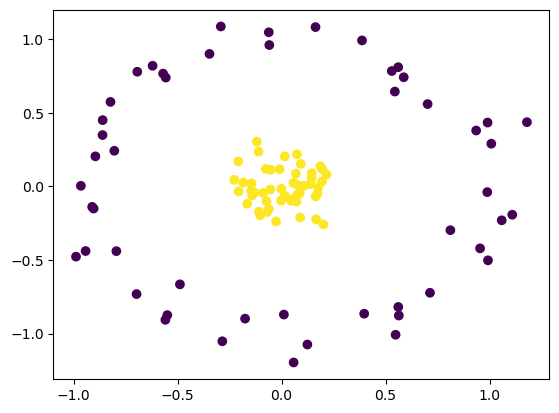

In [307]:
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:,0], X[:,1], c=y);

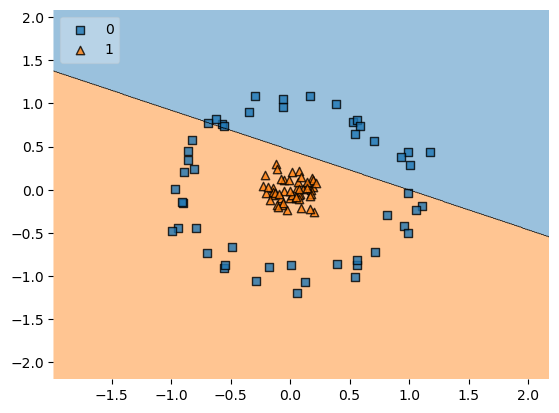

In [308]:
linear_svm = SVC(kernel='linear').fit(X, y)
plot_decision_regions(X, y, clf=linear_svm, legend=2);

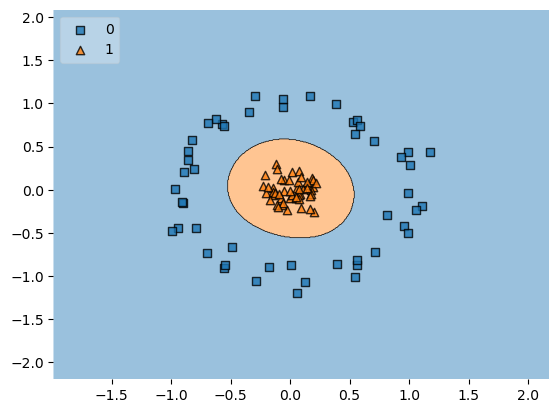

In [309]:
svm = SVC(kernel='rbf')
svm.fit(X, y)

plot_decision_regions(X, y, clf=svm, legend=2);

Сгенерируем две лунки, точки которых представляют разные классы в задаче бинарной классификации.

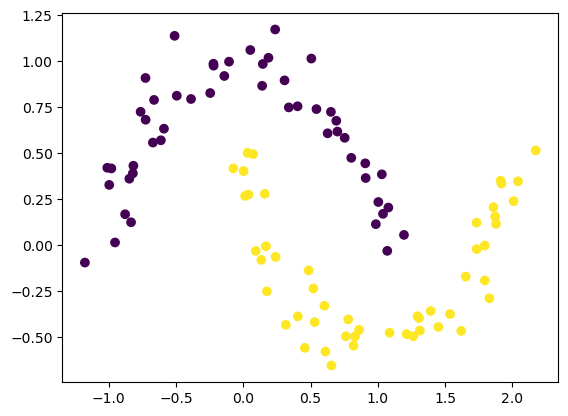

In [310]:
X, y = make_moons(100, noise=.1)

plt.scatter(X[:,0], X[:,1], c=y);

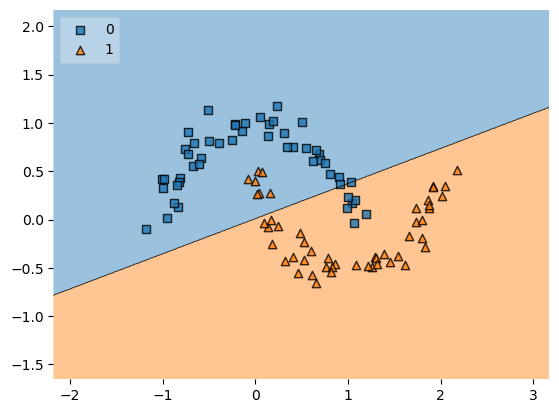

In [311]:
linear_svm = SVC(kernel='linear').fit(X, y)
plot_decision_regions(X, y, clf=linear_svm, legend=2);

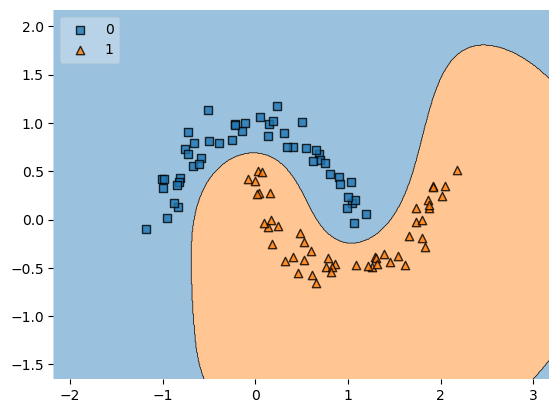

In [312]:
svm = SVC(kernel='rbf',C=1000)
svm.fit(X, y)

plot_decision_regions(X, y, clf=svm, legend=2);

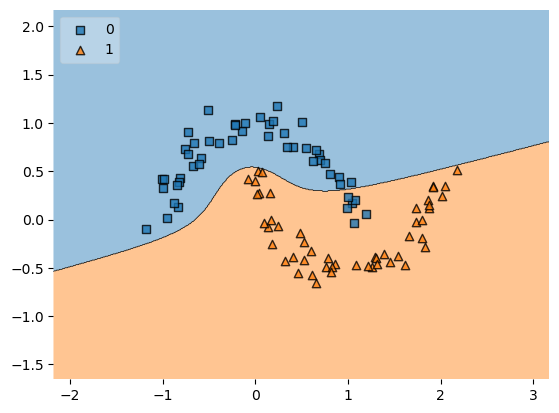

In [313]:
svm = SVC(kernel='poly', degree=3)
svm.fit(X, y)

plot_decision_regions(X, y, clf=svm, legend=2);

# 7.3 Продвинутые (интегральные) метрики классификации

## ROC-AUC

План занятия:

1. Логистическая регрессия

2. Метод опорных векторов

3. Интегральные метрики классификации

4. Регуляризация

5. Подбор гиперпараметров моделей

Будем решать задачу классификации вина по его химическим свойствам.


In [314]:
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine(as_frame = True)

X = data.data
X = X[X.columns[:7]]

y = data.target

In [315]:
y.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [316]:
X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  
0        3.06  
1        2.76  
2        3.24  
3        3.49  
4        2.69


Сведем задачу к бинарной классификации: будем определять, является ли вино вином типа 1 или нет.


In [317]:
y[y != 1] = 0

y.value_counts()

target
0    107
1     71
Name: count, dtype: int64

Разобъем данные на train и test.

In [318]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

Приведем признаки к одному масштабу.

In [319]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = pd.DataFrame(scaler.transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(scaler.transform(Xtest), columns=X.columns)

Обучим метод опорных векторов на тренировочных данных и оценим качество на тестовых данных при помощи метрики ROC-AUC.

Метрика ROC-AUC оперирует в терминах вероятностей, поэтому для ее вычисления алгоритм должен предсказывать вероятности (методом `predict_proba`).

In [320]:
from sklearn.svm import SVC

model = SVC(kernel='linear', probability=True)

model.fit(Xtrain, ytrain)

SVC(kernel='linear', probability=True)

In [321]:
pred = model.predict(Xtest)

In [322]:
probs = model.predict_proba(Xtest)[:,1]

In [323]:
probs[:10]

array([0.00570275, 0.00431358, 0.0104664 , 0.24657607, 0.99151917,
       0.0079244 , 0.94917438, 0.01767482, 0.97133226, 0.02008398])

In [324]:
classes = probs > 0.8

In [325]:
pred[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [326]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, \
recall_score, f1_score

print('accuracy:', accuracy_score(ytest, classes))

accuracy: 0.8888888888888888


In [327]:
confusion_matrix(ytest, classes)

array([[33,  0],
       [ 6, 15]], dtype=int64)

In [328]:
print('precision:', precision_score(ytest, classes))

precision: 1.0


In [329]:
print('recall:', recall_score(ytest, classes))

recall: 0.7142857142857143


In [330]:
print('f1:', f1_score(ytest, classes))

f1: 0.8333333333333334


Для оценки качества будем использовать метрику ROC-AUC.

In [331]:
from sklearn.metrics import roc_auc_score

pred = model.predict_proba(Xtest)[:,1]

roc_auc_score(ytest, pred)

0.9624819624819625

In [332]:
classes = model.predict(Xtest)

print(classes[:5])
print(pred[:5])

[0 0 0 0 1]
[0.00570275 0.00431358 0.0104664  0.24657607 0.99151917]


Также можем нарисовать полученную ROC-кривую.

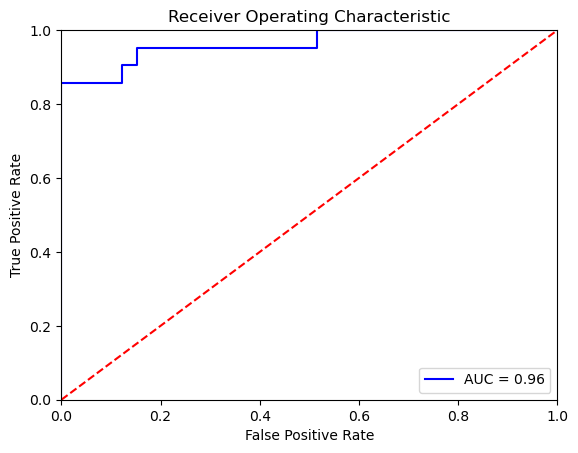

In [333]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(ytest, pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

# 7.4  Домашнее задание - 6

В этом задании вы попрактикуетесь в применении метода опорных векторов, а также примените кросс-валидацию для подбора гиперпараметров и оценки качества моделей!

## Данные

В этой практической работе мы будем обучать модели машинного обучения, ставить эксперименты, подбирать гиперпараметры и сравнивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - `age`
 - `workclass`
 - `fnlwgt`
 - `education`
 - `education-num`
 - `marital-status`
 - `occupation`
 - `relationship`
 - `race`
 - `sex`
 - `capital-gain`
 - `capital-loss`
 - `hours-per-week`

Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

## Бонус ноутбука

Все исследователи данных знают, что SVM из библиотеки `sklearn` работает крайне медленно, поэтому на практике не могут его применять для решения задач.

В этом ноутбуке мы используем средства библиотеки `sklearn intelex` для ускорения обучения SVM в 600 раз!

Ради интереса попробуйте после завершения выполнения заданий в ноутбуке удалить ячейки, связанные с установкой и импортом `sklearn intelex` и засечь время работы методов :)

In [334]:
# from sklearnex import patch_sklearn
# patch_sklearn()

In [335]:
import pandas as pd
import numpy as np
import sys
import os
import site

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from matplotlib import pyplot as plt

sys.path.append(os.path.join(os.path.dirname(site.getsitepackages()[0]), "site-packages"))

## Метрика качества

В задании мы будем оценивать качество моделей с помощью метрики *AUC-ROC*.

Загрузим набор данных `data.adult.csv`.

In [336]:
df = pd.read_csv("data/data.adult.csv")

df.head()

age  workclass  fnlwgt     education  education-num      marital-status  \
0   34  Local-gov  284843       HS-grad              9       Never-married   
1   40    Private  190290  Some-college             10            Divorced   
2   36  Local-gov  177858     Bachelors             13  Married-civ-spouse   
3   22    Private  184756  Some-college             10       Never-married   
4   47    Private  149700     Bachelors             13  Married-civ-spouse   

        occupation   relationship   race     sex  capital-gain  capital-loss  \
0  Farming-fishing  Not-in-family  Black    Male           594             0   
1            Sales  Not-in-family  White    Male             0             0   
2   Prof-specialty      Own-child  White    Male             0             0   
3            Sales      Own-child  White  Female             0             0   
4     Tech-support        Husband  White    Male         15024             0   

   hours-per-week >50K,<=50K  
0              60      <=50K  
1              40      <=50K  
2              40      <=50K  
3              30      <=50K  
4              40       >50K

Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение `numpy.nan`.  
Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html).

В данном датасете пропущенные значения обозначены как "?".

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       16280 non-null  object
 2   fnlwgt          16280 non-null  int64 
 3   education       16280 non-null  object
 4   education-num   16280 non-null  int64 
 5   marital-status  16280 non-null  object
 6   occupation      16280 non-null  object
 7   relationship    16280 non-null  object
 8   race            16280 non-null  object
 9   sex             16280 non-null  object
 10  capital-gain    16280 non-null  int64 
 11  capital-loss    16280 non-null  int64 
 12  hours-per-week  16280 non-null  int64 
 13  >50K,<=50K      16280 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.7+ MB


### Задание

Найдите все признаки, имеющие пропущенные значения.

Затем удалите из выборки все объекты с пропусками.

In [338]:
# your code here
df = df.apply(lambda x: x.replace('?', np.nan))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       15351 non-null  object
 2   fnlwgt          16280 non-null  int64 
 3   education       16280 non-null  object
 4   education-num   16280 non-null  int64 
 5   marital-status  16280 non-null  object
 6   occupation      15347 non-null  object
 7   relationship    16280 non-null  object
 8   race            16280 non-null  object
 9   sex             16280 non-null  object
 10  capital-gain    16280 non-null  int64 
 11  capital-loss    16280 non-null  int64 
 12  hours-per-week  16280 non-null  int64 
 13  >50K,<=50K      16280 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.7+ MB


In [339]:
df.isna().sum()

age                 0
workclass         929
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        933
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
>50K,<=50K          0
dtype: int64

In [340]:
# your code here
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15347 entries, 0 to 16279
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15347 non-null  int64 
 1   workclass       15347 non-null  object
 2   fnlwgt          15347 non-null  int64 
 3   education       15347 non-null  object
 4   education-num   15347 non-null  int64 
 5   marital-status  15347 non-null  object
 6   occupation      15347 non-null  object
 7   relationship    15347 non-null  object
 8   race            15347 non-null  object
 9   sex             15347 non-null  object
 10  capital-gain    15347 non-null  int64 
 11  capital-loss    15347 non-null  int64 
 12  hours-per-week  15347 non-null  int64 
 13  >50K,<=50K      15347 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.8+ MB


Обычно после загрузки датасета всегда необходима его некоторая предобработка.  
В данном случае она будет заключаться в следующем:

 - Выделите целевую переменную y в отдельную переменную и преобразуйте к бинарному формату по правилу:  
 '>50K' - 1, '<=50K' - 0.
 - Выделите матрицу объект-признак `X`, содержащую только вещественные столбцы (числовые) и не содержащую целевой переменной
 - Обратите внимание, что не все признаки являются вещественными. В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [341]:
df.head()

age  workclass  fnlwgt     education  education-num      marital-status  \
0   34  Local-gov  284843       HS-grad              9       Never-married   
1   40    Private  190290  Some-college             10            Divorced   
2   36  Local-gov  177858     Bachelors             13  Married-civ-spouse   
3   22    Private  184756  Some-college             10       Never-married   
4   47    Private  149700     Bachelors             13  Married-civ-spouse   

        occupation   relationship   race     sex  capital-gain  capital-loss  \
0  Farming-fishing  Not-in-family  Black    Male           594             0   
1            Sales  Not-in-family  White    Male             0             0   
2   Prof-specialty      Own-child  White    Male             0             0   
3            Sales      Own-child  White  Female             0             0   
4     Tech-support        Husband  White    Male         15024             0   

   hours-per-week >50K,<=50K  
0              60      <=50K  
1              40      <=50K  
2              40      <=50K  
3              30      <=50K  
4              40       >50K

In [342]:
# your code here
X = df.drop('>50K,<=50K', axis=1).select_dtypes(include='number')
y = df['>50K,<=50K']

y = y.map({'>50K': 1, '<=50K': 0})

### Задание

Cколько столбцов содержит матрица `X`?

Постройте гистограммы для признаков `age`, `fnlwgt`, `capital-gain`. Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

Ответьте на этот вопрос для себя устно.

In [343]:
# your code here
X.shape

(15347, 6)

Масштабируйте все вещественные признаки (масштабированную матрицу назовите, как и раньше, `X`).

In [344]:
from sklearn.preprocessing import StandardScaler
# your code here

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [345]:
X.head()

age    fnlwgt  education-num  capital-gain  capital-loss  \
0 -0.342919  0.900258      -0.450788     -0.065600      -0.21874   
1  0.114760  0.010683      -0.059086     -0.150439      -0.21874   
2 -0.190359 -0.106280       1.116020     -0.150439      -0.21874   
3 -1.258276 -0.041382      -0.059086     -0.150439      -0.21874   
4  0.648719 -0.371197       1.116020      1.995391      -0.21874   

   hours-per-week  
0        1.588223  
1       -0.074178  
2       -0.074178  
3       -0.905379  
4       -0.074178

## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В этом задании необходимо проверять качество алгоритмов по кросс-валидации. Напомним, что это за процесс.


### Кросс-валидация [обучающий текст]

Разбивать данные на train-test как мы делали раньше - неплохой подход. Однако при этом подходе мы привязываем и обучение модели, и оценку качества к конкретному разбиению, а для другого разбиения можем получить модель совершенно другого качества, что плохо.

Поэтому хочется оценить качество модели без привязки к конкретному разбиению на train-test. Для этого все обучающие данные разбиваются на несколько равных блоков (фолдов), и затем модель обучается несколько раз:
* первый раз - на всех блоках, кроме 1-го, а качество оценивается на 1-м блоке
* второй раз - на всех блоках, кроме 2-го, а качество оценивается на 2-м блоке и так далее
Для оценки качества модели полученные значения метрик на тестовых блоках усредняются - это называется *k-fold кросс-валидацией*.

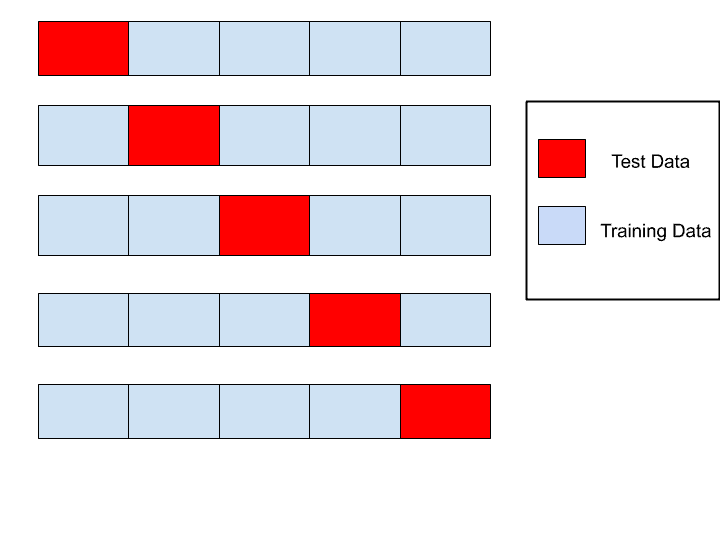

Сначала обучите по кросс-валидации c **тремя** фолдами и метрикой **roc_auc** алгоритмы:
*  LogisticRegression
*  SVC(kernel='linear')

Остальные параметры оставьте по умолчанию.

In [346]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# пример для логистической регрессии

cross_val_score(LogisticRegression(), X, y, cv=3, scoring='roc_auc', verbose=2).mean()

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


0.8250542558106667

In [347]:
# посмотрите на среднее качество SVC с линейным ядром

# your code here

cross_val_score(SVC(kernel='linear'), X, y, cv=3, scoring='roc_auc', verbose=2).mean()

[CV] END .................................................... total time=   4.4s
[CV] END .................................................... total time=   3.6s
[CV] END .................................................... total time=   3.3s


0.8099949416917513

### Задание

Чему равно качество наилучшей из этих моделей?  
Ответ округлите до десятых.

Теперь посмотрим как влияет подбор гиперпараметров на качество предсказания моделей. Сейчас и далее будем рассматривать два алгоритма:
 - Logistic Regression
 - SVC (Support Vector Classifier)

У обоих алгоритмов будем оптимизировать гиперпараметр С, а у SVC - ещё гиперпараметр kernel.

*  Ищите C в диапазоне от 0.01 до 10.01 с шагом 0.25
*  Перебирайте ядра из списка ['rbf','poly','sigmoid','linear']

### Подбор гиперпараметров по сетке (GridSearchCV) [обучающий текст]

Раз уж мы начали использовать кросс-валидацию, то будем использовать ее по-максимуму. Для подбора гиперпараметров модели также можно применить этот подход вместо разбиения на train и test.

Идея подбора гиперпараметров по сетке:

* задаем список перебираемых значений гиперпараметров (можно подбирать одновременно несколько гиперпараметров)

* для каждого набора значений гиперпараметров вычисляем качество модели по кросс-валидации

* итоговый ответ - это набор значений гиперпараметров, для которого модель имеет наибольшее качество на кросс-валидации.

Метод, реализующий эту схему, называется GridSearchCV.

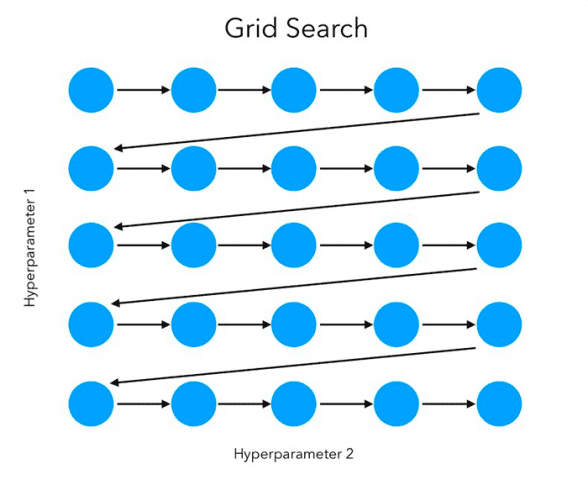

Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе GridSearchCV. В качестве схемы кросс-валидации используйте 3-fold cv.

Покажем пример использования GridSearchCV.

In [348]:
# подберите C у логистической регрессии

from sklearn.model_selection import GridSearchCV

params = {'C' : [1, 2, 3]} # задаем словарь параметров и список перебираемых значений - в данном случае ищем C из списка [1,2,3]

gs = GridSearchCV(LogisticRegression(), params, cv=3, scoring='roc_auc')
# первый параметр - модель, второй - словарь параметров, третий - число фолдов, четвертый - метрика

gs.fit(X, y) # применяем метод к данным X, y (GridSearchCV сам разобъет данные на фолды)

print(gs.best_score_) # качество наилучшей модели (с оптимальными гиперпараметрами)
print(gs.best_params_) # оптимальные гиперпараметры

0.8250542558106667
{'C': 1}


In [349]:
# your code here

In [350]:
# так как SVM работает долго, то:
# сначала первым gridsearch подберите у метода только kernel
# вторым gridsearch для найденного ядра подберите C в диапазане от 0.01 до 2.01 с шагом 0.25

# your code here

params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

gs = GridSearchCV(SVC(), param_grid=params, cv=3, scoring='roc_auc')
gs.fit(X, y)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='roc_auc')

In [351]:
best_kernel = gs.best_params_
print(gs.best_score_) # качество наилучшей модели (с оптимальными гиперпараметрами)
print(best_kernel)

0.8099949416917513
{'kernel': 'linear'}


In [352]:
best_kernel.values()

dict_values(['linear'])

In [353]:
import numpy as np

params = {'kernel': ['linear'], 'C': np.arange(0.01, 2.01, 0.25)}

gs = GridSearchCV(SVC(), param_grid=params, cv=3, scoring='roc_auc')
gs.fit(X, y)

print(gs.best_score_) # качество наилучшей модели (с оптимальными гиперпараметрами)
print(gs.best_params_) # оптимальные гиперпараметры

0.8117091946783695
{'C': 0.01, 'kernel': 'linear'}


### Задание

Какой из алгоритмов имеет наилучшее качество?

Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков.

*  Преобразуйте все категориальные признаки (исходной матрицы df) с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [`pandas.get_dummies`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html). Чтобы избежать переобучения, в `get_dummies` поставьте гиперпараметр **`drop_first=True`**.

*  Заново масштабируйте данные

In [354]:
X_old = df.drop('>50K,<=50K', axis=1)

col_cat = [col for col in X_old.columns if X_old[col].dtype == 'object']

In [355]:
X_new = pd.get_dummies(data=X_old, columns=col_cat, drop_first=True)

scaler = StandardScaler()
X_new = pd.DataFrame(scaler.fit_transform(X_new), columns=X_new.columns)

X_new.head()

age    fnlwgt  education-num  capital-gain  capital-loss  \
0 -0.342919  0.900258      -0.450788     -0.065600      -0.21874   
1  0.114760  0.010683      -0.059086     -0.150439      -0.21874   
2 -0.190359 -0.106280       1.116020     -0.150439      -0.21874   
3 -1.258276 -0.041382      -0.059086     -0.150439      -0.21874   
4  0.648719 -0.371197       1.116020      1.995391      -0.21874   

   hours-per-week  workclass_Local-gov  workclass_Private  \
0        1.588223             3.658322          -1.665953   
1       -0.074178            -0.273349           0.600257   
2       -0.074178             3.658322          -1.665953   
3       -0.905379            -0.273349           0.600257   
4       -0.074178            -0.273349           0.600257   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
0               -0.194785                   -0.307272  ...   
1               -0.194785                   -0.307272  ...   
2               -0.194785                   -0.307272  ...   
3               -0.194785                   -0.307272  ...   
4               -0.194785                   -0.307272  ...   

   relationship_Not-in-family  relationship_Other-relative  \
0                    1.711163                    -0.175191   
1                    1.711163                    -0.175191   
2                   -0.584398                    -0.175191   
3                   -0.584398                    -0.175191   
4                   -0.584398                    -0.175191   

   relationship_Own-child  relationship_Unmarried  relationship_Wife  \
0               -0.416530               -0.338654          -0.227941   
1               -0.416530               -0.338654          -0.227941   
2                2.400786               -0.338654          -0.227941   
3                2.400786               -0.338654          -0.227941   
4               -0.416530               -0.338654          -0.227941   

   race_Asian-Pac-Islander  race_Black  race_Other  race_White  sex_Male  
0                -0.182943    3.101735    -0.08727   -2.443271  0.686401  
1                -0.182943   -0.322400    -0.08727    0.409287  0.686401  
2                -0.182943   -0.322400    -0.08727    0.409287  0.686401  
3                -0.182943   -0.322400    -0.08727    0.409287 -1.456874  
4                -0.182943   -0.322400    -0.08727    0.409287  0.686401  

[5 rows x 56 columns]

Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем добавлять их и подбирать заново оптимальные гиперпараметры.

Обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 3-Fold CV в функции `cross_val_score`.

In [356]:
#your code here

cross_val_score(SVC(kernel='linear', C=0.01), X_new, y, cv=3, scoring='roc_auc', verbose=2).mean()

[CV] END .................................................... total time=   2.0s
[CV] END .................................................... total time=   1.9s
[CV] END .................................................... total time=   1.9s


0.8981838913603667

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

### Задание

*  Разбейте данные на тренировочную и тестовую часть (либо данные только с числовыми признаками, либо данные после OneHot-кодировки - в зависимости от того, на каких данных модели лучше отработали).

**Вопрос:**  
стали ли модели лучше решать задачу при добавлении закодированных категориальных признаков?

*test_size = 0.25, random_state = 42*

* Cреди всех обученных в работе моделей возьмите наилучшую (по roc-auc).
Заново обучите эту модель на тренировочных данных, сделайте предсказание на тесте.

* Постройте roc-кривую и отметьте на ней значение roc-auc - по тестовым данным.

In [357]:
from sklearn.model_selection import train_test_split

#your code here

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=42)

svm = SVC(kernel='linear', C=0.1, probability=True)

svm.fit(X_train, y_train)

y_pred = svm.predict_proba(X_test)

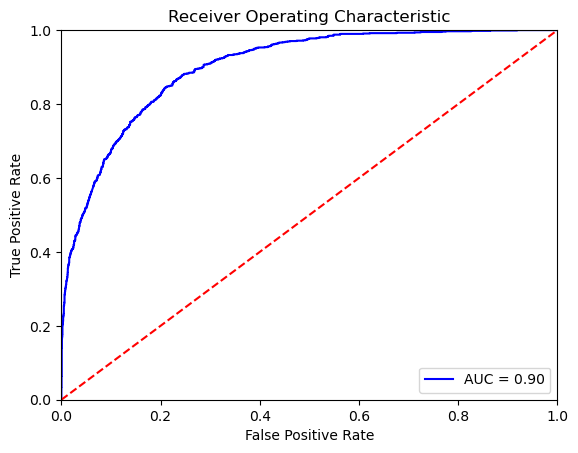

In [358]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

#your code here

fpr, tpr, threshold = roc_curve(y_test, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

### Задание

Чему равен `roc-auc` наилучшей модели на тестовых данных?

In [359]:
roc_auc_score = roc_auc_score(y_test, y_pred[:, 1])
print(roc_auc_score)

0.9005516347245933


# 8.1 Многоклассовая и multilabel-классификация

## Импорт библиотек, установка константных значений, загрузка данных

In [360]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [361]:
RANDOM_STATE = 42
TRAIN_SIZE = 0.75

In [362]:
data = load_iris(as_frame=True)

X = data.data
y = data.target

## Практика

Посмотрим на целевую переменную.

In [363]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

Разобъем данные на тренировочную и тестовую части.

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=TRAIN_SIZE,
                                                    random_state=RANDOM_STATE)

X_train.shape, X_test.shape

((112, 4), (38, 4))

Применим логистическую регрессию для решения задачи.

У этой модели есть гиперпараметр `multi_class`, который может принимать значения:
* `ovr`
* `multinomial`

`ovr` - это сведение многоклассовой задаче к серии бинарных методом `one-versus-rest`

`multinomial` - это решение исходной задачи путем обобщения функции потерь логистической регрессии на многоклассовый случай (в многоклассовом случае используется функция потерь под названием [кросс-энтропия](https://en.wikipedia.org/wiki/Logistic_regression)).


Сначала используем опцию `ovr`.  
Обучим модель на тренировочных данных, сделаем предсказания на тесте и оценим качество по метрике *accuracy*.

In [365]:
model_ovr = LogisticRegression(multi_class='ovr')

model_ovr.fit(X_train, y_train)

pred_ovr = model_ovr.predict(X_test)

accuracy_score(y_test, pred_ovr)

0.9736842105263158

Теперь используем подход `multinomial`.

In [366]:
model_mn = LogisticRegression(multi_class='multinomial', max_iter=1000)

model_mn.fit(X_train, y_train)

pred_mn = model_mn.predict(X_test)

accuracy_score(y_test, pred_mn)

1.0

Подход с опцией `multinomial` сработал в этой задаче лучше.

Однако, это не означает, что он всегда будет работать лучше.

Посмотрим на другие метрики.

In [367]:
print(classification_report(y_test, pred_ovr, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        15
           1    1.00000   0.90909   0.95238        11
           2    0.92308   1.00000   0.96000        12

    accuracy                        0.97368        38
   macro avg    0.97436   0.96970   0.97079        38
weighted avg    0.97571   0.97368   0.97358        38



In [368]:
print(classification_report(y_test, pred_mn)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Мы видим, что модель, полученная в результате `ovr` подхода, путает между собой ирисы типов 1 и 2.

Модель `multinomial` - ничего не путает.

# 8.2 Метод ближайших соседей

## Импорт библиотек, установка константных значений

In [369]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle

from matplotlib import pyplot as plt

In [370]:
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

## Практика

Применим KNN к датасету с изображениями цифр. Это данные для 10-классовой классификации.

Загрузим данные и посмотрим на них.

In [371]:
data = load_digits()
X = data.images
y = data.target

X.shape

(1797, 8, 8)

In [372]:
X[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

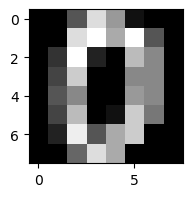

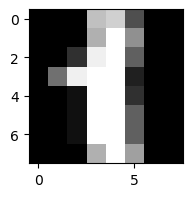

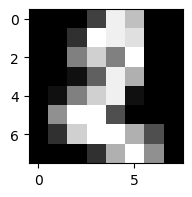

In [373]:
for i in range(3):
  plt.figure(figsize=(2,2))
  plt.imshow(X[i], cmap='gray')
  plt.show()

Каждая картинка - это матрица чисел (яркостей пикселей). Но в стандартной постановке задач каждый объект (картинка) - это строчка своих признаков в матрице объект-признак. Поэтому вытянем каждую картинку в вектор.

In [374]:
X = X.reshape(X.shape[0], -1)

X.shape

(1797, 64)

Разобъем данные на трейн и тест.

In [375]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X,
    y,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE
    )

Обучим KNN с взятым из головы числом соседей (10).

In [376]:
clf = KNeighborsClassifier(n_neighbors=10)

clf.fit(Xtrain, ytrain)
prediction = clf.predict(Xtest)

In [377]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, prediction)

0.9814814814814815

Посмотрим, как число соседей влияет на качество модели.

In [378]:
for k in np.arange(3, 50, 2):
    clf = KNeighborsClassifier(n_neighbors=k)

    clf.fit(Xtrain, ytrain)
    prediction = clf.predict(Xtest)

    print('k:', k)
    print('accuracy:', accuracy_score(ytest, prediction))

k: 3
accuracy: 0.9888888888888889
k: 5
accuracy: 0.9925925925925926
k: 7
accuracy: 0.9907407407407407
k: 9
accuracy: 0.9814814814814815
k: 11
accuracy: 0.9796296296296296
k: 13
accuracy: 0.9777777777777777
k: 15
accuracy: 0.975925925925926
k: 17
accuracy: 0.9777777777777777
k: 19
accuracy: 0.9722222222222222
k: 21
accuracy: 0.9722222222222222
k: 23
accuracy: 0.9722222222222222
k: 25
accuracy: 0.9666666666666667
k: 27
accuracy: 0.9666666666666667
k: 29
accuracy: 0.9629629629629629
k: 31
accuracy: 0.9629629629629629
k: 33
accuracy: 0.9611111111111111
k: 35
accuracy: 0.9555555555555556
k: 37
accuracy: 0.9537037037037037
k: 39
accuracy: 0.9462962962962963
k: 41
accuracy: 0.9462962962962963
k: 43
accuracy: 0.9444444444444444
k: 45
accuracy: 0.9425925925925925
k: 47
accuracy: 0.937037037037037
k: 49
accuracy: 0.9351851851851852


Посмотрим, как влияет на качество алгоритма способ учесть веса у ближайших соседей.

In [379]:
for weights in ['uniform', 'distance']:
    clf = KNeighborsClassifier(n_neighbors=3, weights=weights)

    clf.fit(Xtrain, ytrain)
    prediction = clf.predict(Xtest)

    print('weights:', weights)
    print('accuracy:', accuracy_score(ytest, prediction))

weights: uniform
accuracy: 0.9888888888888889
weights: distance
accuracy: 0.9888888888888889


Визуально оценим качество предсказаний

predicted label: 6


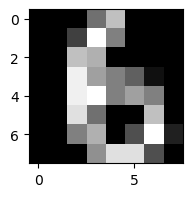

predicted label: 9


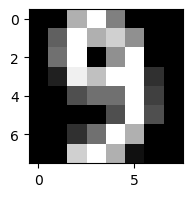

predicted label: 3


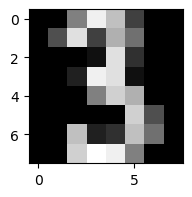

predicted label: 7


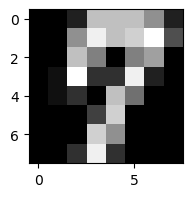

predicted label: 2


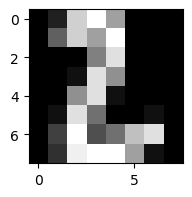

In [380]:
for i in range(5):
  print('predicted label:', prediction[i])
  plt.figure(figsize=(2,2))
  plt.imshow(Xtest[i].reshape((8,8)), cmap='gray')
  plt.show()

Мы видим, что KNN довольно хорошо справился с задачей!  
Подбор гиперпараметров (число соседей, способ подсчета весов соседей и другие) также влияет на качество предсказания модели.

true label: 7
predicted label: 9


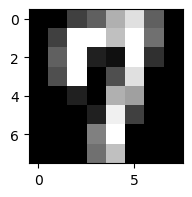

true label: 9
predicted label: 8


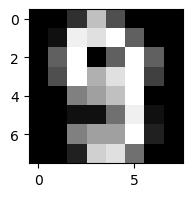

true label: 9
predicted label: 4


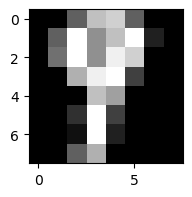

true label: 8
predicted label: 1


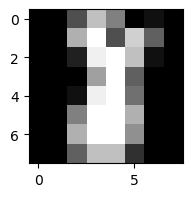

true label: 9
predicted label: 5


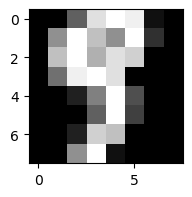

true label: 9
predicted label: 3


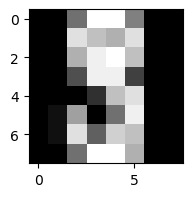

In [381]:
for i in range(len(ytest)):
   if ytest[i] != prediction[i]:
      print('true label:', ytest[i])
      print('predicted label:', prediction[i])
      plt.figure(figsize=(2,2))
      plt.imshow(Xtest[i].reshape((8,8)), cmap='gray')
      plt.show()

# 8.3 KNN с использованием LSH (locality sensitive hashing - Быстрый поиск соседей)

## Импорт библиотек, установка константных значений

In [382]:
import numpy as np

RANDOM_STATE = 42
rng = np.random.default_rng(RANDOM_STATE)

## Генерация данных

Для демонстрации сгенерируем датасет из нормального распределения, где $m$ - число объектов, $n$ - число признаков.

In [383]:
m = 50000
n = 10000

$q$ - вектор запроса (query), для которого мы ищем ближайших соседей.

In [384]:
X = rng.normal(size=(m, n))  # датасет
q = rng.normal(size=n)       # вектор запроса

## Поиск с помощью стандартного KNN

In [385]:
def knn_search(query, data, k=5):

    dists = np.sqrt(np.sum((data - query) ** 2, axis=1))  # вычисляем расстояния от объекта query до всех точек датасета
    inds = np.argsort(dists)  # сортируем по возрастанию расстояний
    inds_k = inds[:k]         # берем top-k точек с наименьшими расстояниями

    return data[inds_k], dists[inds_k]

Найдем 5 ближайших соседей методом KNN.

Также замерим время работы поиска.

In [386]:
%%time

neighbors, dists = knn_search(q, X)
for i, (neighbor, dist) in enumerate(zip(neighbors, dists)):
    print(f"top {i + 1}: dist = {dist}")

top 1: dist = 137.756240373655
top 2: dist = 138.09987299681939
top 3: dist = 138.19452917680704
top 4: dist = 138.22857049450062
top 5: dist = 138.2429317007995
CPU times: total: 5.39 s
Wall time: 8.32 s


## KNN с использованием LSH

Идея метода состоит в том, что:
* Сначала при помощи LSH отбираем объекты, похожие на объект query
* Затем при помощи KNN ищем ближайшие объекты к query только среди похожих, найденных на предыдущем шаге

Используем метод LSH с кодированием при помощи случайных проекций. Он состоит в следующем:
* проводим несколько случайных гиперплоскостей
* для каждой плоскости: для каждого объекта ставим 1, если объект лежит выше плоскости, и 0 иначе
* тогда каждый объект кодируется вектором из 0 и 1, где длина вектора равна числу сгенерированных гиперплоскостей

Объекты похожи, если их кодировки совпадают.

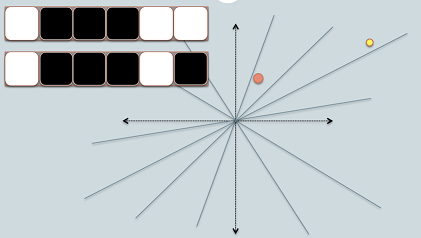

Следующая функция вычисляет количество случайных гиперплоскостей и генерирует их, основываясь на том, сколько в среднем мы хотим получать объектов в одной корзине после хеширования (`bucket_size`).

In [387]:
def generate_hyperplanes(data, bucket_size=16):
    m = data.shape[0]            # число объектов
    n = data.shape[1]            # число признаков
    b = m // bucket_size         # количество корзин
    h = int(np.log2(b))          # количество гиперплоскостей
    H = rng.normal(size=(h, n))  # гиперплоскости, заданные своими нормалями
    return H

Следующая функция хеширует данные, основываясь на полученных гиперплоскостях, то есть кодирует объект вектором из 0 и 1.

Затем для удобства функция переводит вектор в число путем перевода из двоичной системы в десятичную.

Например: $[0, 1, 1, 0] \to 0 \cdot 1 + 1 \cdot 2 + 1 \cdot 4 + 0 \cdot 8 = 6$

Между двоичной и десятичной записью взаимно однозначное соответствие, но десятичная запись удобнее.  
По сути полученное число - это номер корзины, в которую попадает объект.

In [388]:
def hamming_hash(data, hyperplanes):
    b = len(hyperplanes)
    hash_key = (data @ hyperplanes.T) >= 0

    dec_vals = np.array([2 ** i for i in range(b)], dtype=int)
    hash_key = hash_key @ dec_vals

    return hash_key

Теперь мы умеем по каждому объекту определять номер корзины, в которую он попадает.

Функция ниже создает словарь, где для каждой корзины содержатся элементы выборки, попадающие в эту корзину  
(эта структура называется *хеш-таблицей*).

In [389]:
def locality_sensitive_hash(data, hyperplanes):
    hash_vals = hamming_hash(data, hyperplanes)
    hash_table = {}
    for i, v in enumerate(hash_vals):
        if v not in hash_table:
            hash_table[v] = set()
        hash_table[v].add(i)

    return hash_table

Посмотрим, как работают описанные функции.

In [390]:
hyperplanes = generate_hyperplanes(X)

print('num planes:', len(hyperplanes))
print('normal vector to 1st plane:', hyperplanes[0])

num planes: 11
normal vector to 1st plane: [-0.85479774  1.70833663 -0.34637502 ...  0.09880598  1.01129995
 -1.73940005]


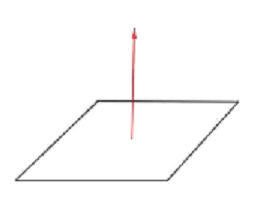

In [391]:
hamming_hash(q, hyperplanes)

1221

In [392]:
hash_table = locality_sensitive_hash(X, hyperplanes)
hash_table

{1885: {0,
  4753,
  9006,
  10544,
  11896,
  13519,
  14075,
  15891,
  16257,
  16587,
  17565,
  18758,
  20126,
  23463,
  24965,
  26799,
  27211,
  27613,
  27751,
  30955,
  35145,
  35596,
  39352,
  41158,
  43556,
  43603,
  43908,
  47045,
  47873},
 1976: {1,
  3324,
  6606,
  8717,
  16742,
  18730,
  22164,
  22817,
  24671,
  25207,
  27734,
  27996,
  29837,
  31242,
  35419,
  42339,
  44287,
  47267},
 288: {2,
  421,
  1241,
  3151,
  5016,
  6276,
  6422,
  8606,
  8934,
  9631,
  10637,
  11534,
  12397,
  27080,
  27505,
  28763,
  32084,
  32786,
  33596,
  33836,
  34124,
  35823,
  37868,
  38110,
  41332,
  45457},
 1783: {3,
  990,
  3064,
  8462,
  8733,
  9069,
  11091,
  11232,
  17954,
  19507,
  19613,
  23131,
  29477,
  31951,
  33208,
  34581,
  35123,
  35636,
  35837,
  42577,
  47260,
  48697},
 1144: {4,
  501,
  903,
  1157,
  4334,
  6622,
  7752,
  10215,
  12248,
  12294,
  13348,
  14559,
  21199,
  22100,
  22105,
  26263,
  31516,
  31683,

Теперь реализуем алгоритм поиска KNN с использованием LSH:
* Сначала при помощи LSH отбираем объекты, похожие на объект query
* Затем при помощи KNN ищем ближайшие объекты к query только среди похожих, найденных на предыдущем шаге

In [393]:
def approx_knn_search(query, data, k=5, bucket_size=16):
    candidates = set()

    hyperplanes = generate_hyperplanes(data)
    hash_table = locality_sensitive_hash(data, hyperplanes) # формируем хеш-таблицу по датасету

    query_hash = hamming_hash(query, hyperplanes)
    if query_hash in hash_table:
        candidates = candidates.union(hash_table[query_hash])
    candidates = np.stack([data[i] for i in candidates], axis=0) # находим кандидатов = объекты, попадающие с query в одну корзину

    return knn_search(query, candidates, k=k) # с помощью KNN ищем ближайших соседей только из найденных кандидатов

In [394]:
%%time

neighbors, dists = approx_knn_search(q, X)

for i, (neighbor, dist) in enumerate(zip(neighbors, dists)):
    print(f"top {i + 1}: dist = {dist}")

top 1: dist = 139.87830415534592
top 2: dist = 139.9269850003241
top 3: dist = 140.06224062385834
top 4: dist = 140.24104537711904
top 5: dist = 140.48024515404026
CPU times: total: 2.12 s
Wall time: 395 ms


# 8.4 Домашнее задание - 7

В этом домашнем задании вы будете решать задачу классификации бутылок вина по различным характеристикам.

## Импорт библиотек, установка константных значений

In [395]:
import pandas as pd
import numpy as np

In [396]:
RANDOM_STATE = 42
TRAIN_SIZE = 0.75

In [397]:
rng = np.random.default_rng(RANDOM_STATE)

## Загрузка данных

In [398]:
from sklearn.datasets import load_wine

data = load_wine(as_frame=True)

X = data.data
y = data.target

## Задание 1

Посмотрите на количество классов и количество объектов каждого класса в датасете.

**Вопрос**:  
Сколько классов в задаче?

In [399]:
# ваш код здесь

print('y.value_counts:\n', y.value_counts())
print('count of y.value_counts:\n', len(y.value_counts()))

y.value_counts:
 target
1    71
0    59
2    48
Name: count, dtype: int64
count of y.value_counts:
 3


## Задание 2

Мы имеем дело с многоклассовой классификацией. Кроме того, классы не очень хорошо сбалансированы, поэтому для оценки качества модели метрика *accuracy* не подойдет.

Разбейте данные на тренировочную и тестовую части:  
тестовая часть - 25% от всех данных, зафиксируйте `random_state = RANDOM_STATE`.

In [400]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

**Вопрос:**

Все ли признаки в данных одного масштаба?  
Проверьте это, выведя основные числовые характеристики матрицы `X_train` методом `describe` из библиотеки `pandas`.

По полученной таблице числовых характеристик определите, какой признак измеряется в сотнях?  
(если вариантов несколько, выберите признак с наибольшим средним значением).

In [401]:
X_desc = X.describe()
X_desc

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [402]:
# ваш код здесь

cols = X_desc.columns
sign_in_hundreds = []
for col in cols:
    v_mean = X_desc.at['mean', col]
    if v_mean / 100 >= 1.0:
        sign_in_hundreds.append(col)

print(sign_in_hundreds)

['proline']


## Задание 3

KNN требует того, чтобы все признаки были одного масштаба, поэтому масштабируйте данные при помощи `StandardScaler`.

Напоминаем, что обучать метод нужно только по тренировочным данным, а применять и к трейну, и к тесту.

После применения `StandardScaler` преобразуйте `X_train` и `X_test` к типу `pd.DataFrame`, названия новых объектов оставьте `X_train` и `X_test`.

In [403]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Обучите KNN с параметрами по умолчанию на тренировочных данных и сделайте предсказание на тесте.

In [404]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Будем измерять качество модели по метрике weighted $f1$-score.

Чтобы выбрать тип усреднения (micro, macro, weighted) в функции `f1_score` необходимо задать этот тип в гиперпараметре `average`.

Вычислите $f1$-score на тестовых данных.

**Вопрос:**

Чему равен $f1$-score на тестовых данных?

In [405]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='weighted')

0.9550512333965844

## Задание 4

Попробуем улучшить модель.

Подберите оптимальное количество соседей (`n_neighbors`) из диапазона *от 3 до 30 с шагом 2* и веса соседей (`weights`):  
`uniform`, `distance` по кросс-валидации с тремя фолдами на тренировочных данных.

Используйте `GridSearchCV` и метрику `f1_weighted`.

In [406]:
from sklearn.model_selection import GridSearchCV

# ваш код здесь
KNeighborsClassifier()
params = {'n_neighbors': np.arange(3, 30, 2), 'weights': ['uniform', 'distance']}

gd_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, scoring='f1_weighted', cv=3, n_jobs=-1)
gd_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [407]:
KNeighborsClassifier()

KNeighborsClassifier()

Возьмите best_estimator_, полученный при обучении GridSearchCV и с помощью него  
сделайте предсказание на тесте и вычислите метрику `f1_weighted`.

In [408]:
# ваш код здесь

y_pred_best = gd_search.predict(X_test)
f1_score(y_test, y_pred_best, average='weighted')

0.9550512333965844

**Вопрос:**

Удалось ли при помощи подбора гиперпараметров улучшить качество модели на тестовых данных?

## Задание 5

Выведите на экран матрицу ошибок.

Используйте модель с подобранными при помощи `GridSearch` гиперпараметрами.


**Вопрос:**  
По этой матрице определите, какие классы между собой путает модель?

In [409]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_best)

array([[15,  0,  0],
       [ 1, 16,  1],
       [ 0,  0, 12]], dtype=int64)

## Бонус (эксперименты с LSH)

Скопируйте все функции из [ноутбука в уроке "Быстрый поиск соседей"](https://colab.research.google.com/drive/181MMOcTnzdMVzJr0pWzqtEG0-BV9BIHH).

In [410]:
# ваш код здесь
def knn_search(query, data, k=5):

    dists = np.sqrt(np.sum((data - query) ** 2, axis=1))  # вычисляем расстояния от объекта query до всех точек датасета
    inds = np.argsort(dists)  # сортируем по возрастанию расстояний
    inds_k = inds[:k]         # берем top-k точек с наименьшими расстояниями

    return data[inds_k], dists[inds_k]

При помощи `knn_search` найдите ближайших соседей к вину `X_test.iloc[0]` в **тренировочных** данных.

Обратите внимание, что функция `knn_search` принимает на вход `np.array`, а не `pd.DataFrame`. Поэтому переведите аргументы в `np.array`, приписав к необходимому объекту $X$: `X.values`.

In [411]:
%%time

# ваш код здесь

neighbors, dists = knn_search(X_test.iloc[0].values, X_train.values)
for i, (neighbor, dist) in enumerate(zip(neighbors, dists)):
    print(f"top {i + 1}: dist = {dist}")
    print(f'Признаки : {neighbor}')

top 1: dist = 1.7873320988662762
Признаки : [ 1.50827494  1.46438454  0.52877788 -1.80468392  1.82295821  1.12384935
  1.01701759 -1.2933229   0.82004316  0.03755595 -0.29719787  1.26510707
  0.05563253]
top 2: dist = 1.9809624052592747
Признаки : [ 0.92777049 -0.65479046 -0.40129023 -0.87828967  1.15375191  0.50202111
  0.87726211 -1.21423695  0.0197522   0.37936305 -0.16880684  0.81131867
  1.03694899]
top 3: dist = 2.1601016426727613
Признаки : [-0.05183075  1.29083141  1.02958379 -0.24139362  0.08302183  0.20665269
  0.38811793 -0.89789314  0.64606686 -0.23588973  0.30196024  1.25135591
  0.08834308]
top 4: dist = 2.270974564253457
Признаки : [ 1.50827494 -0.62738734 -0.22243098 -0.90723949  1.15375191  1.43476348
  0.97708746 -0.81880719  0.73305501  0.62090673 -0.08321283  0.96258147
  0.74255405]
top 5: dist = 2.3117955237515453
Признаки : [ 1.31477345 -0.69132796 -0.29397468 -0.99408895  1.68911695  1.12384935
  1.14679054 -0.97697909  0.85483842  0.28821449  0.55874228  1.5126

Выведите на экран признаки объекта `X_test.iloc[0]` и признаки ближайшего найденного соседа.

In [412]:
# ваш код здесь
pd.concat([pd.DataFrame([X_test.iloc[0]]), pd.DataFrame(X_train.iloc[1]).T])

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.806832    0.651425  0.707637          -1.225688   1.019911   
1 -1.079807   -0.280281 -2.368742          -0.559842  -0.251581   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.657478    1.007035             -1.530581         0.089343   
1      -0.073170    0.148537             -0.818807        -0.362996   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.037556  0.002381                      1.031337  0.333672  
1        -0.782781  1.329088                      0.481291 -0.107920

**Вопрос:**

Можно ли сказать, что в тренировочных данных есть вино, почти такое же как `X_test.iloc[0]`? (все признаки почти одинаковые)

Какое расстояние между объектом запроса и первым ближайшим соседом?

Теперь найдите ближайшего соседа при помощи `approx_knn_search`.

In [413]:
def generate_hyperplanes(data, bucket_size=16):
    m = data.shape[0]            # число объектов
    n = data.shape[1]            # число признаков
    b = m // bucket_size         # количество корзин
    h = int(np.log2(b))          # количество гиперплоскостей
    H = rng.normal(size=(h, n))  # гиперплоскости, заданные своими нормалями
    return H

In [414]:
def hamming_hash(data, hyperplanes):
    b = len(hyperplanes)
    hash_key = (data @ hyperplanes.T) >= 0

    dec_vals = np.array([2 ** i for i in range(b)], dtype=int)
    hash_key = hash_key @ dec_vals

    return hash_key

In [415]:
def locality_sensitive_hash(data, hyperplanes):
    hash_vals = hamming_hash(data, hyperplanes)
    hash_table = {}
    for i, v in enumerate(hash_vals):
        if v not in hash_table:
            hash_table[v] = set()
        hash_table[v].add(i)

    return hash_table

In [416]:
def approx_knn_search(query, data, k=5, bucket_size=16):
    candidates = set()

    hyperplanes = generate_hyperplanes(data)
    hash_table = locality_sensitive_hash(data, hyperplanes) # формируем хеш-таблицу по датасету

    query_hash = hamming_hash(query, hyperplanes)
    if query_hash in hash_table:
        candidates = candidates.union(hash_table[query_hash])
    candidates = np.stack([data[i] for i in candidates], axis=0) # находим кандидатов = объекты, попадающие с query в одну корзину

    return knn_search(query, candidates, k=k) # с помощью KNN ищем ближайших соседей только из найденных кандидатов

In [417]:
%%time

# ваш код здесь

neighbors, dists = approx_knn_search(X_test.iloc[0].values, X_train.values)

for i, (neighbor, dist) in enumerate(zip(neighbors, dists)):
    print(f"top {i + 1}: dist = {dist}")

top 1: dist = 1.787332098866276
top 2: dist = 2.3117955237515453
top 3: dist = 2.4714256477971346
top 4: dist = 2.482865265933602
top 5: dist = 2.554033097597557
CPU times: total: 0 ns
Wall time: 0 ns


Ближайший сосед при помощи KNN+LSH может быть найден не точно или не с первого запуска.  
Запустите последнюю ячейку несколько раз и убедитесь, что ближайший сосед находится верно за несколько запусков.

**Вопрос:**

Запустите `knn_search` и `appox_knn_search` несколько раз и сравните время запусков. Какой из подходов в этой задаче работает быстрее?

In [418]:
%%time

# ваш код здесь

neighbors, dists = knn_search(X_test.iloc[0].values, X_train.values)
for i, (neighbor, dist) in enumerate(zip(neighbors, dists)):
    print(f"top {i + 1}: dist = {dist}")

top 1: dist = 1.7873320988662762
top 2: dist = 1.9809624052592747
top 3: dist = 2.1601016426727613
top 4: dist = 2.270974564253457
top 5: dist = 2.3117955237515453
CPU times: total: 0 ns
Wall time: 0 ns


In [419]:
%%time

neighbors, dists = approx_knn_search(X_test.iloc[0].values, X_train.values)

for i, (neighbor, dist) in enumerate(zip(neighbors, dists)):
    print(f"top {i + 1}: dist = {dist}")

top 1: dist = 1.787332098866276
top 2: dist = 1.9809624052592747
top 3: dist = 2.1601016426727613
top 4: dist = 2.270974564253457
top 5: dist = 2.3117955237515453
CPU times: total: 0 ns
Wall time: 998 μs


In [420]:
# На плоскости даны следующие точки в двумерном пространстве : X=[(−1,1),(1,−1),(1,1),(0,0)]
# с соответствующими метками классов :                         y=[1,1,1,−1].
# С помощью leave-one-out кросс-валидации найдите оптимальное число соседей k∈[1,2,3] в методе ближайших соседей. 
# В качестве меры близости используется евклидово расстояние,  метрика качества - accuracy.

from sklearn.model_selection import LeaveOneOut

X_data = [(-1,1),(1,-1),(1,1),(0,0)]
X = pd.DataFrame(X_data, columns=['X1', 'X2'])

y_data = [1,1,1,-1]
y = pd.DataFrame(y_data, columns=['y'])

display(pd.concat([X, y], axis=1))

loo = LeaveOneOut()
params = {'n_neighbors': [1, 2, 3]}

gs = GridSearchCV(KNeighborsClassifier(metric='euclidean'), params, scoring='accuracy', cv=loo)

gs.fit(X, y)

print(gs)
print('gs.best_score_: ', gs.best_score_)
print('gs.best_params_: ', gs.best_params_)
print('gs.best_estimator_: ', gs.best_estimator_) # 

X1  X2  y
0  -1   1  1
1   1  -1  1
2   1   1  1
3   0   0 -1

GridSearchCV(cv=LeaveOneOut(),
             estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': [1, 2, 3]}, scoring='accuracy')
gs.best_score_:  0.75
gs.best_params_:  {'n_neighbors': 3}
gs.best_estimator_:  KNeighborsClassifier(metric='euclidean', n_neighbors=3)
